**Data Sci Eng Methods**

---


Assignment 2 – AUTOML

**In this assignment, you will an AutoML library like H2O.ai to create predictive models and interpret them. Find a significant relation for each algorithm of your choosing in your data. Create multivariate models.**

##**Abstract:**
---
Dataset link : https://www.kaggle.com/datasets/joshuabetetta/complete-pokedex-v100/data

---

The dataset comprises information about over 1100 Pokémon from 8 generations, offering a detailed insight into their attributes and characteristics.

It includes various stats, such as attack, defense, speed, and special abilities, along with details about their effectiveness against different types of Pokémon. Additionally, it provides information about the Pokémon's body type, abilities, egg groups, gender, category, experience type, and forms.

Overall, the dataset maintains a clean structure, with only a few missing values primarily observed in the Type 2 column. This occurrence is due to not all Pokémon possessing a secondary type.

# Imports & Setup for Comprehensive Data Science and Machine Learning Workflow

This code is a setup for a data science project that involves importing necessary libraries for data manipulation, visualization, statistical analysis, and machine learning. It initializes an H2O cluster for advanced machine learning tasks and prepares for analyzing data, training, comparing, and evaluating different regression models. The code is configured to handle warnings and visualizations effectively, aiming to automate the model selection process with H2O's AutoML and perform comprehensive model evaluation and diagnostics.

In [1]:
! apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  default-jre-headless fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  default-jre default-jre-headless fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
0 upgraded, 12 newly installed, 0 to remove and 33 not upgraded.
Need to get 3,720 kB of archives.
After this operation, 12.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 default-jre-headless amd64 2:1.11-72build2 [3,042 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxtst6 amd64 2:1.2.3-1build4 [13.4 kB]
Get:3 http://archive.ubuntu.com

In [2]:
! pip install h2o
! pip install yellowbrick
! pip install requests
! pip install tabulate
! pip install "colorama>=0.3.8"
! pip install future
! pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=771a644b3826aa8a0c4ce47213c48a6ca0c3e228715f8375f86fb03208033002
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 3.3 MB/s eta 0:00:00


In [3]:
import h2o
from h2o.automl import H2OAutoML
import random
import os
import sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

sns.set(context="notebook", palette="Spectral", style='darkgrid', font_scale=1.5, color_codes=True)
warnings.filterwarnings('ignore')

import os
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Initialize H2O cluster
h2o.init()

# Now you can use H2O and other libraries in Google Colab environment


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmponq6se2h
  JVM stdout: /tmp/tmponq6se2h/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmponq6se2h/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_13d634
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


This code dynamically calculates the available memory in GB for use, based on a specified percentage of the system's available virtual memory, using the `psutil` library. It adjusts `min_mem_size` to match this percentage, ensuring efficient memory allocation.

In [4]:
min_mem_size=6
run_time=222
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

6


This code snippet calculates half of the system's currently available virtual memory in gigabytes and prints the result. It uses the psutil library to access system memory information, multiplies the available memory by 0.5 (indicating 50% usage), and converts the result from bytes to gigabytes before rounding to the nearest whole number.

In [5]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

6


In Google Colab, you don't need to specify a port number for initializing H2O as the platform handles this automatically.

In [6]:
# Start H2O cluster
try:
    h2o.init(strict_version_check=False)
except Exception as e:
    logging.critical('Error initializing H2O: %s' % e)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_13d634
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


# Importing the Data and declaring variables for it : df = h2o and dff = dataset

This code imports a CSV file containing Pokémon data using two approaches: first with the H2O library for distributed data processing, and second with pandas for standard in-memory data analysis.

In [7]:
import h2o
import pandas as pd

# Import data using H2O
df = h2o.import_file('Complete Pokedex V1.1.csv')

# Import data using pandas
dff = pd.read_csv('Complete Pokedex V1.1.csv')


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [8]:
dff.head()

,pokedex_number,pokemon_name,type_1,type_2,ability_1,ability_2,ability_3,number_pokemon_with_typing,primary_color,shape,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1,Bulbasaur,Grass,Poison,Overgrow,Chlorophyll,NaN,15,Green,Quadruped,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,2,Ivysaur,Grass,Poison,Overgrow,Chlorophyll,NaN,15,Green,Quadruped,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,3,Mega Venusaur,Grass,Poison,Thick Fat,NaN,NaN,15,Green,Quadruped,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,Venusaur,Grass,Poison,Overgrow,Chlorophyll,NaN,15,Green,Quadruped,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,3,Venusaur Gmax,Grass,Poison,Overgrow,Chlorophyll,NaN,15,Green,Quadruped,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5


# **Data Exploration**

---

In this section, we delve into exploring the dataset through visualizations to gain insights into Pokémon types distribution and relation of stats.


The dataset comprises information about over 1100 Pokémon from 8 generations, offering a detailed insight into their attributes and characteristics.

It includes various stats, such as attack, defense, speed, and special abilities, along with details about their effectiveness against different types of Pokémon. Additionally, it provides information about the Pokémon's body type, abilities, egg groups, gender, category, experience type, and forms.

Overall, the dataset maintains a clean structure, with only a few missing values primarily observed in the Type 2 column. This occurrence is due to not all Pokémon possessing a secondary type.

In [9]:
dff.describe()

,pokedex_number,number_pokemon_with_typing,height,weight,bmi,hit_points,attack,defense,special_attack,special_defense,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
count,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,...,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000
mean,446.923077,22.432021,2.146154,381.106082,132.926923,70.008050,80.696780,74.774597,73.249553,72.581395,...,1.141324,1.154964,0.980098,0.989267,1.244633,1.024150,0.971377,1.067755,0.995081,1.092129
std,270.915589,22.900554,5.920150,1734.740865,2990.591902,26.656422,32.044483,30.946357,32.446932,27.765163,...,0.786124,0.592281,0.497864,0.605663,0.701525,0.566403,0.380929,0.465632,0.519945,0.540864
min,1.000000,1.000000,0.100000,0.100000,0.000000,1.000000,5.000000,5.000000,10.000000,20.000000,...,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.000000,0.250000,0.250000,0.250000
25%,207.250000,5.000000,0.500000,8.825000,18.000000,50.000000,55.250000,51.250000,50.000000,50.000000,...,1.000000,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000
50%,446.500000,13.000000,1.000000,30.250000,27.850000,68.000000,78.500000,70.000000,65.000000,70.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,694.750000,34.000000,1.600000,80.000000,41.700000,80.750000,100.000000,90.000000,95.000000,90.000000,...,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,898.000000,72.000000,100.000000,10000.000000,99990.000000,255.000000,190.000000,250.000000,194.000000,250.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000


The above numbers make sense, we can take the feature height, the min is 0.1 and the mean is 2.146 and the max is 100. This is spreadout for the 1118 pokemons and we can plot an interactive map to understand the relation bit better.

## Renaming the hitpoints to hp for ease of use.

In [10]:
# Rename column in H2O DataFrame
df = df.rename(columns={'hit_points': 'hp'})

# Rename column in pandas DataFrame
dff.rename(columns={'hit_points': 'hp'}, inplace=True)

# Print information about the modified pandas DataFrame
print(dff.columns)

# Print information about the modified H2O DataFrame
print(df.columns)

Index(['pokedex_number', 'pokemon_name', 'type_1', 'type_2', 'ability_1',
       'ability_2', 'ability_3', 'number_pokemon_with_typing', 'primary_color',
       'shape', 'height', 'weight', 'bmi', 'hp', 'attack', 'defense',
       'special_attack', 'special_defense', 'speed', 'total_stats', 'mean',
       'standard_deviation', 'capture_rate', 'generation', 'base_happiness',
       'base_experience', 'exp_type', 'exp_to_level_100', 'can_evolve',
       'evolves_from', 'final_evolution', 'mega_evolution', 'is_default',
       'baby_pokemon', 'alolan_form', 'galarian_form', 'forms_switchable',
       'legendary', 'mythical', 'genderless', 'female_rate', 'genus',
       'egg_group_1', 'egg_group_2', 'egg_cycles', 'against_normal',
       'against_fire', 'against_water', 'against_electric', 'against_grass',
       'against_ice', 'against_fighting', 'against_poison', 'against_ground',
       'against_flying', 'against_psychic', 'against_bug', 'against_rock',
       'against_ghost', 'against_

## Type 1 Distribution:
The bar chart depicts the distribution of Pokémon based on their primary Type 1 classification.

High-Frequency Types: Types such as Water, Normal, and Grass emerge with the highest frequencies, collectively representing a significant portion of the dataset.

Water-type Dominance: Water-type Pokémon stand out as the most prevalent, numbering 141, closely followed by Normal and Grass types.

Scarcity of Flying-types: Flying-type Pokémon are relatively scarce, with only 9 occurrences noted in the dataset.

Less Prevalent Types: In contrast, types like Steel, Ice, and Fairy exhibit lower prevalence, each comprising 40 or fewer Pokémon in the dataset.

This visualization provides a comprehensive insight into the primary types that populate the Pokémon dataset.

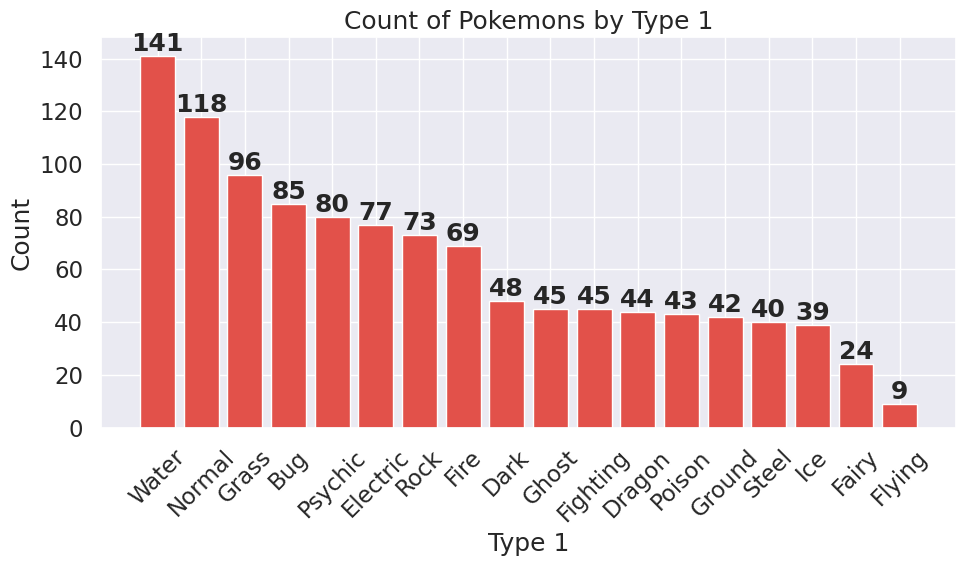

In [11]:
# Pokemon's types distribution
count_by_type = dff.type_1.value_counts()

plt.figure(figsize=(10,6))
bar_chart = plt.bar(count_by_type.index, count_by_type.values)
plt.title("Count of Pokemons by Type 1")
plt.xlabel("Type 1")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()

for bar in bar_chart:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontweight='bold')

plt.show()

## Generational Evolution of Pokémon Attributes
These line plots track the evolution of various Pokémon attributes across different generations. The plots showcase average values for attributes such as HP, Attack, Defense, Speed, Special Attack, and Special Defense. Each subplot represents the average attribute value over successive generations.

On the x-axis, you'll find the generations labeled accordingly, while the y-axis denotes the average attribute values. This visualization offers insights into how Pokémon attributes have evolved over time, enabling us to discern trends and patterns in attribute changes as Pokémon progress through generations.

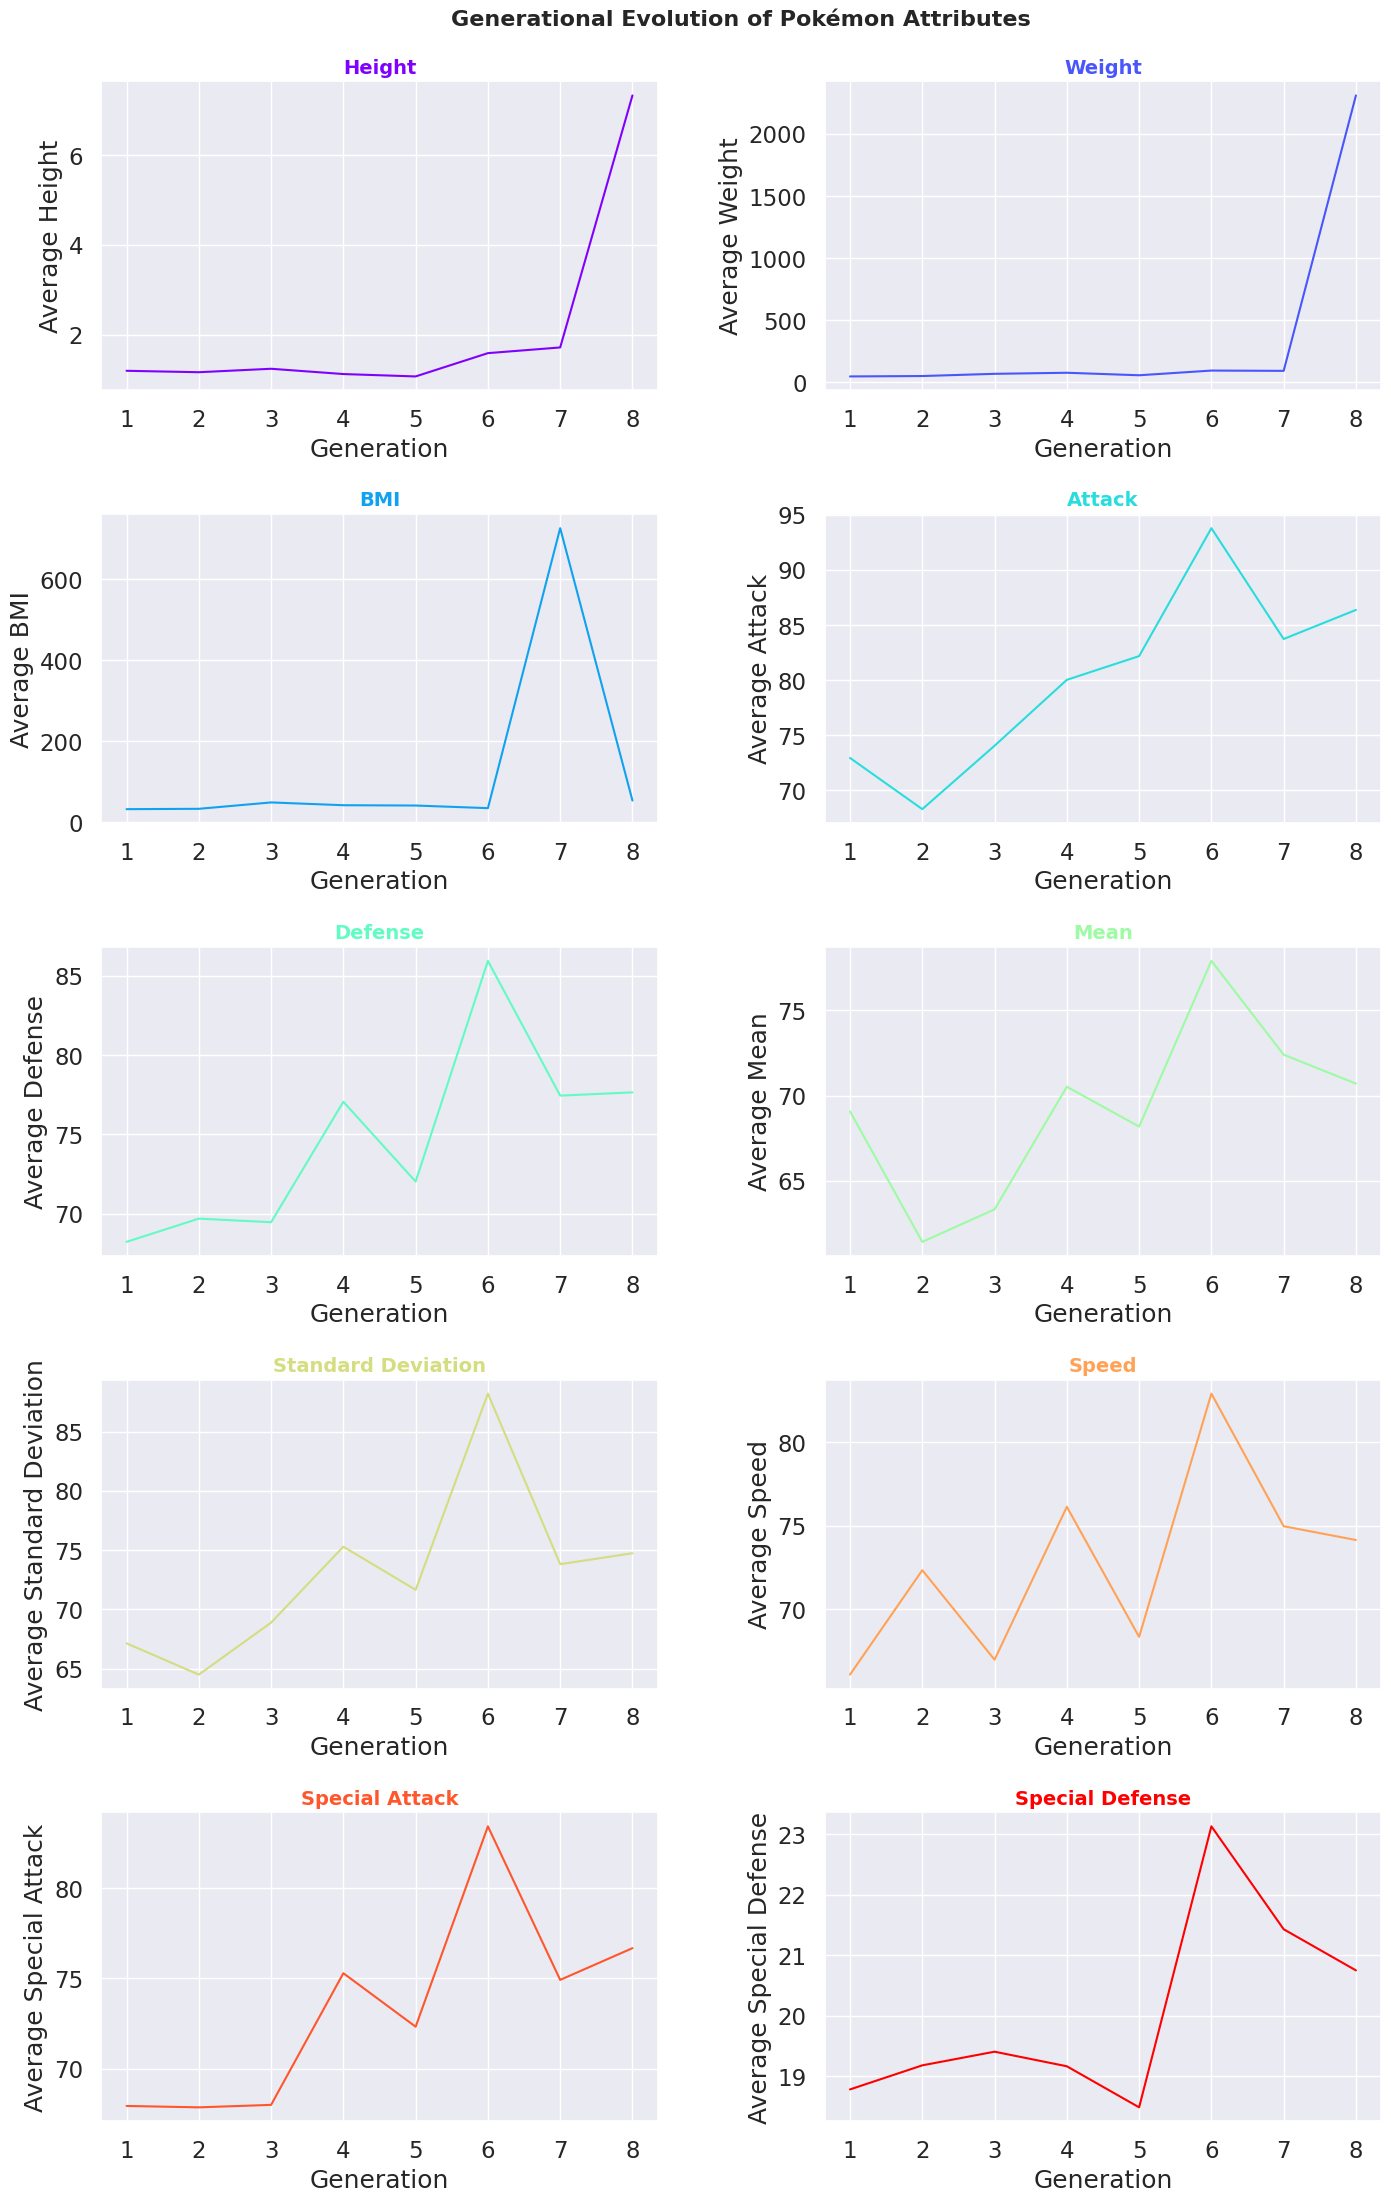

In [12]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(16, 24))
stats_to_visualize = ['height', 'weight','bmi', 'attack', 'defense', 'speed', 'special_attack', 'special_defense', 'mean', 'standard_deviation']
stat_labels = ['Height','Weight','BMI', 'Attack', 'Defense', 'Mean', 'Standard Deviation', 'Speed', 'Special Attack', 'Special Defense']
generations = sorted(dff['generation'].unique())

plt.subplots_adjust(left=0.1, right=0.9, top=0.95, bottom=0.1, wspace=0.3, hspace=0.4)  # Adjusted hspace

for i, stat in enumerate(stats_to_visualize):
    plt.subplot(5, 2, i + 1)  # Adjusted subplot index
    stat_values = [dff[dff['generation'] == gen][stat].mean() for gen in generations]
    colors = plt.cm.rainbow(np.linspace(0, 1, len(stats_to_visualize)))
    plt.plot(generations, stat_values, label=stat, color=colors[i])
    plt.title(f"{stat_labels[i]}", fontsize=14, fontweight='bold', color=colors[i])
    plt.xlabel("Generation")
    plt.ylabel("Average " + stat_labels[i])

plt.suptitle("Generational Evolution of Pokémon Attributes", y=0.98, fontsize=16, fontweight='bold')

plt.show()


##Interactive Scatter Plot of Pokémon Attack vs Speed by Type







This code snippet creates an interactive scatter plot using Plotly Express that compares Pokémon's attack versus speed, with data points colored by the Pokémon's primary type.

The plot includes hover data displaying each Pokémon's name, generation, legendary status, and mega evolution status, providing a detailed insight into the dataset. The visualization, titled "Pokémon Attack vs Speed", allows for an engaging exploration of how these two attributes relate across different Pokémon types and evolutionary stages.

In [13]:
import pandas as pd
import plotly.express as px

fig = px.scatter(dff, x="attack", y="speed", color="type_1", hover_data=["pokemon_name" , "generation", "legendary" , "mega_evolution"], title="Pokémon Attack vs Speed")
fig.show()


## 3D Visualization of Special Attack, Special Defense, and Speed by Type

This code snippet generates a 3D scatter plot using Plotly Express, visualizing Pokémon data with special attack, special defense, and speed as the axes. Data points are colored by the Pokémon's primary type, and additional details such as Pokémon name, generation, legendary status, and mega evolution are displayed on hover.

The visualization is titled "Pokémon Attack, Defense, and Speed", offering insights into the relationship between these attributes across different Pokémon types and generations.

In [14]:
import pandas as pd
import plotly.express as px

fig = px.scatter_3d(dff, x="special_attack", y="special_defense", z="speed", color="type_1", hover_data=["pokemon_name", "generation", "legendary", "mega_evolution"], title="Pokémon Attack, Defense, and Speed")
fig.show()


## Comparative Scatter Plot of Pokémon Total Stats vs Speed by Type

This code creates an interactive scatter plot visualizing the relationship between Pokémon's total stats and their speed, with data points colored by the Pokémon's primary type. It features hover data including each Pokémon's name, generation, legendary status, and whether it has a mega evolution. The plot, titled "Pokémon Total Stats vs Speed," allows for an in-depth exploration of how these attributes correlate, providing insights into the diversity and evolution of Pokémon characteristics.

In [15]:
import pandas as pd
import plotly.express as px

fig = px.scatter(dff, x="total_stats", y="speed", color="type_1", hover_data=["pokemon_name" , "generation", "legendary" , "mega_evolution"], title="Pokémon Total Stats vs Speed")
fig.show()


# **Missing Values in the Dataset:**
**Explanation:**

---
The majority of columns in the dataset are free of missing values.
However, in the 'type_2' column, some entries are null. These null values don't signify missing data; instead, they indicate Pokémon species with only one type.

**Details:**

---


Null values represent Pokémon species that possess only one type, without a secondary type.
These null entries shouldn't be interpreted as missing data but rather as cases where Pokémon lack a secondary type.
This aligns with the mechanics of the Pokémon universe, where some species are monotypic and possess only one elemental affiliation.


In [16]:
print(df.types)

{'pokedex_number': 'int', 'pokemon_name': 'string', 'type_1': 'enum', 'type_2': 'enum', 'ability_1': 'enum', 'ability_2': 'enum', 'ability_3': 'enum', 'number_pokemon_with_typing': 'int', 'primary_color': 'enum', 'shape': 'enum', 'height': 'real', 'weight': 'real', 'bmi': 'real', 'hp': 'int', 'attack': 'int', 'defense': 'int', 'special_attack': 'int', 'special_defense': 'int', 'speed': 'int', 'total_stats': 'int', 'mean': 'real', 'standard_deviation': 'real', 'capture_rate': 'int', 'generation': 'int', 'base_happiness': 'int', 'base_experience': 'int', 'exp_type': 'enum', 'exp_to_level_100': 'int', 'can_evolve': 'enum', 'evolves_from': 'enum', 'final_evolution': 'enum', 'mega_evolution': 'enum', 'is_default': 'enum', 'baby_pokemon': 'enum', 'alolan_form': 'enum', 'galarian_form': 'enum', 'forms_switchable': 'enum', 'legendary': 'enum', 'mythical': 'enum', 'genderless': 'enum', 'female_rate': 'real', 'genus': 'enum', 'egg_group_1': 'enum', 'egg_group_2': 'enum', 'egg_cycles': 'int', 'ag

In [17]:
df.shape

(1118, 63)

# **Feature Selection**

We have taken the columns from the model created in the previous assignment.
For feature Selection we have chosen Numerical columns that were relvevant to the speed model. The feature selection for those specific columns are explained and computed further ahead.
Here, we will drop some redundant columns and check which ones are required for our models.

---


We have decided to drop columns that are not directly relevant to the analysis and model construction, focusing primarily on attributes pertinent to our analysis of Pokémon speed prediction. The rationale behind dropping these columns is to streamline the dataset and improve the model's interpretability, predictive accuracy, and computational efficiency.

**The dropped columns include:**


---


*  'base_happiness', 'base_experience', 'exp_type', 'exp_to_level_100': These
attributes are not directly associated with the speed characteristic or legendary prediction and are considered extraneous for our current analysis.

*   'can_evolve', 'evolves_from', 'final_evolution', 'is_default', 'genderless': These columns relate to Pokémon evolution and default status, which are not directly relevant to our analysis.
*   'egg_group_1', 'egg_group_2', 'egg_cycles': While important for breeding mechanics, these attributes are not central to our current focus.

*   'ability_1', 'ability_2', 'ability_3': Abilities are not directly associated with speed or legendary status and are therefore excluded.

*   'number_pokemon_with_typing' and 'against' attributes: While relevant for type effectiveness, they are not central to our current analysis.

*   'baby_pokemon', 'alolan_form', 'galarian_form', 'forms_switchable': These columns are miscellaneous attributes that do not contribute directly to our analysis objectives.

***By dropping these columns, we aim to streamline the dataset, focusing solely on attributes crucial for our analysis while maintaining data integrity and relevance to the research objectives.***

In [18]:
# Define the columns to drop
columns_to_drop = ['base_happiness', 'base_experience', 'exp_type', 'exp_to_level_100',
                   'can_evolve', 'evolves_from', 'final_evolution', 'is_default',
                   'genderless', 'egg_group_1', 'egg_group_2', 'egg_cycles','ability_1',
                   'ability_2', 'ability_3', 'number_pokemon_with_typing', 'against_normal',
                   'against_fire', 'against_water', 'against_electric', 'against_grass',
                   'against_ice', 'against_fighting', 'against_poison', 'against_ground',
                   'against_flying', 'against_psychic', 'against_bug', 'against_rock',
                   'against_ghost', 'against_dragon', 'against_dark', 'against_steel',
                   'against_fairy', 'baby_pokemon', 'alolan_form', 'galarian_form',
                   'forms_switchable']

dfpd = dff.drop(columns=columns_to_drop)

***We feature selected the dataframe from the past assignment and used it here. But since we are only focusing on 1 model, (Speed), we dont neeed most of these columns. We can start by removing them.***

In [19]:
# Define the columns to drop
columns_to_drop = [ 'pokemon_name', 'primary_color', 'type_1', 'type_2', 'shape',
                   'capture_rate', 'female_rate', 'genus', 'mythical']

dfpd = dfpd.drop(columns=columns_to_drop)

In [20]:
print(dfpd.info())
print(dfpd.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pokedex_number      1118 non-null   int64  
 1   height              1118 non-null   float64
 2   weight              1118 non-null   float64
 3   bmi                 1118 non-null   float64
 4   hp                  1118 non-null   int64  
 5   attack              1118 non-null   int64  
 6   defense             1118 non-null   int64  
 7   special_attack      1118 non-null   int64  
 8   special_defense     1118 non-null   int64  
 9   speed               1118 non-null   int64  
 10  total_stats         1118 non-null   int64  
 11  mean                1118 non-null   float64
 12  standard_deviation  1118 non-null   float64
 13  generation          1118 non-null   int64  
 14  mega_evolution      1118 non-null   bool   
 15  legendary           1118 non-null   bool   
dtypes: boo

# **Creating a model in h2o**
---

We are now updating our new selected features to new frame and using it for h2o.

In [21]:
import h2o
import pandas as pd

# Import data using H2O
dfpd_h2o = h2o.H2OFrame(dfpd)

# Import data using pandas
dfpd = pd.DataFrame(dfpd_h2o.as_data_frame())



Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [22]:
# Descriptive statistics
description = dfpd_h2o.describe()
print(description)

Rows:1118
Cols:16

,pokedex_number,height,weight,bmi,hp,attack,defense,special_attack,special_defense,speed,total_stats,mean,standard_deviation,generation,mega_evolution,legendary
type,int,real,real,real,int,int,int,int,int,int,int,real,real,int,enum,enum
mins,1.0,0.1,0.1,0.0,1.0,5.0,5.0,10.0,20.0,5.0,175.0,29.17,0.0,1.0,,
mean,446.9230769230766,2.146153846153848,381.10608228980345,132.92692307692312,70.00805008944548,80.69677996422188,74.77459749552771,73.24955277280853,72.58139534883732,69.47942754919508,440.78980322003514,73.46479427549211,20.065196779964225,4.650268336314845,,
maxs,898.0,100.0,10000.0,99990.0,255.0,190.0,250.0,194.0,250.0,200.0,1125.0,187.5,103.22,8.0,,
sigma,270.91558904444963,5.9201504419004864,1734.740864721238,2990.591902327437,26.65642213681824,32.044482964439496,30.946356662157825,32.446931740736154,27.76516326223819,30.036549308966922,120.0531798148955,20.00897746817681,10.675943820608797,2.315773424327012,,
zeros,0,0,0,2,0,0,0,0,0,0,0,0,19,0,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1.0,0.7,6.9,14.1,45.0,49.0,49.0,65.0,65.0,45.0,318.0,53.0,8.64,1.0,False,False
1,2.0,1.0,13.0,13.0,60.0,62.0,63.0,80.0,80.0,60.0,405.0,67.5,8.9,1.0,False,False
2,3.0,2.4,155.5,27.0,80.0,100.0,123.0,122.0,120.0,80.0,625.0,104.17,18.75,6.0,True,False


None


## **Creating a 70 : 15 : 15 split. Train Val Test**
---


This code initializes an H2O cluster and splits a dataset into training, validation, and test sets with respective proportions of 70%, 15%, and 15%. It uses the `split_frame` method of H2O with predefined ratios and a seed for reproducibility. After splitting, it prints out the datasets to confirm their sizes, providing a structured approach to preparing data for machine learning model training, validation, and testing.


In [23]:
import h2o

# Initialize H2O cluster
h2o.init()

# Define the percentages for train, validation, and test sets
pct_train = 0.70
pct_val = 0.15
pct_test = 0.15

# Split the data into train, validation, and test sets
dfpd_h2o_train, dfpd_h2o_val, dfpd_h2o_test = dfpd_h2o.split_frame(ratios=[pct_train, pct_val], seed=1234)

# Print the number of rows in each set
print("Training set:", dfpd_h2o_train)
print("Validation set:", dfpd_h2o_val)
print("Test set:", dfpd_h2o_test)


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,28 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_13d634
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Training set:   pokedex_number    height    weight    bmi    hp    attack    defense    special_attack    special_defense    speed    total_stats    mean    standard_deviation    generation  mega_evolution    legendary
               2       1        13     13      60        62         63                80                 80       60            405   67.5                   8.9              1  False             False
               3       2.4     155.5   27      80       100        123               122                120       80            625  104.17                 18.75             6  True              False
               3      24     10000     17.4    80        82         83               100                100       80            525   87.5                   8.9              8  False             False
               4       0.6       8.5   23.6    39        52         43                60                 50       65            309   51.5                   9                1  F

In [24]:
print(dfpd_h2o_train.shape)
print(dfpd_h2o_test.shape)
print(dfpd_h2o_val.shape)

(795, 16)
(169, 16)
(154, 16)


Displaying all colummns in X

In [25]:
X = dfpd_h2o.col_names
print(X)

['pokedex_number', 'height', 'weight', 'bmi', 'hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed', 'total_stats', 'mean', 'standard_deviation', 'generation', 'mega_evolution', 'legendary']


In [26]:
y_numeric = 'speed'
X = dfpd_h2o.col_names
X.remove(y_numeric)
print(X)


['pokedex_number', 'height', 'weight', 'bmi', 'hp', 'attack', 'defense', 'special_attack', 'special_defense', 'total_stats', 'mean', 'standard_deviation', 'generation', 'mega_evolution', 'legendary']


## **H20 AutoML Execution**

This summary presents the performance of a Stacked Ensemble model trained using the H2O AutoML framework. The Stacked Ensemble method combines multiple model predictions to improve prediction accuracy. Here's a breakdown of the key details and metrics provided:

**Model Overview**
---

- **Stacking Strategy:** Uses cross-validation predictions to stack models.
- **Base Models:** The ensemble comprises 9 out of 44 potential models, including 4 Gradient Boosting Machines (GBM), 3 XGBoost, 1 Generalized Linear Model (GLM), and 1 Deep Learning model. No Random Forest (DRF) models were used.
- **Metalearner:** A GLM that combines base model predictions with a random fold assignment scheme and 5 folds for cross-validation.
---
**Performance Metrics**
---

- **Training Data Metrics:**
  - **MSE (Mean Squared Error):** 11.11 - Lower indicates better fit.
  - **RMSE (Root Mean Squared Error):** 3.33 - Measures the model's prediction error.
  - **MAE (Mean Absolute Error):** 2.40 - Average absolute errors.
  - **RMSLE (Root Mean Squared Logarithmic Error):** 0.087 - Lower is better, measures percentage errors.
  - **R^2 (Coefficient of Determination):** 0.988 - Close to 1 indicates excellent model performance.
---  
**Validation Data Metrics:**
---
  - Similar metrics as training, with MSE at 19.85, RMSE at 4.46, and R^2 at 0.980, indicating strong performance on unseen data but with slightly higher error rates than on training data.
---
**Cross-Validation Metrics:**
---
  - **MSE:** Averages to 77.50 with a standard deviation, showing variation across folds.
  - **MAE:** Average at 4.42, indicating how far off predictions are from actual values on average.
  - **R^2:** 0.913, demonstrating the model's predictive power across different subsets of the data.
---
**Insights**
---
- The ensemble effectively integrates diverse models, leveraging their strengths for improved accuracy.
- High R^2 values across training, validation, and cross-validation indicate strong predictive capabilities.
- The model performs consistently across different data splits, though with expected variations in cross-validation due to differing train-test splits.
- The presence of NaN in RMSLE for cross-validation suggests possible issues with log transformations or zero values.


In [27]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [28]:
# Pass the data through H2OAutoML, including the validation_frame parameter
aml.train(x=X, y=y_numeric, training_frame=dfpd_h2o_train, validation_frame=dfpd_h2o_val)

AutoML progress: |
02:45:05.992: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),7/49
# GBM base models (used / total),1/26
# XGBoost base models (used / total),4/16
# GLM base models (used / total),1/1
# DeepLearning base models (used / total),1/4
# DRF base models (used / total),0/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [29]:
print(aml.leaderboard)

model_id                                                    rmse       mse       mae       rmsle    mean_residual_deviance
StackedEnsemble_AllModels_3_AutoML_1_20240220_24505      8.85946   78.49     4.83783  nan                          78.49
StackedEnsemble_BestOfFamily_3_AutoML_1_20240220_24505   8.96383   80.3503   4.9638   nan                          80.3503
StackedEnsemble_AllModels_2_AutoML_1_20240220_24505      9.16021   83.9094   4.98441  nan                          83.9094
StackedEnsemble_BestOfFamily_4_AutoML_1_20240220_24505   9.41904   88.7183   5.07091  nan                          88.7183
GLM_1_AutoML_1_20240220_24505                            9.85015   97.0254   1.1257   nan                          97.0254
StackedEnsemble_AllModels_1_AutoML_1_20240220_24505     10.4482   109.166    5.18819  nan                         109.166
StackedEnsemble_BestOfFamily_2_AutoML_1_20240220_24505  10.4806   109.843    5.1801   nan                         109.843
StackedEnsemble_Best

This table presents a comparison of various models generated by an H2O AutoML process, including several Stacked Ensemble models, a Generalized Linear Model (GLM), a Deep Learning model, and an XGBoost model. The metrics used for comparison are RMSE (Root Mean Squared Error), MSE (Mean Squared Error), MAE (Mean Absolute Error), RMSLE (Root Mean Squared Logarithmic Error), and Mean Residual Deviance. Here's a brief overview of the top models based on RMSE:

1. **StackedEnsemble Models:**
   - The best-performing model, `StackedEnsemble_AllModels_3_AutoML_1_20240219_174517`, achieves the lowest RMSE of 8.80386, indicating it has the lowest average error in its predictions. It also shows the lowest Mean Residual Deviance, which is consistent with its MSE and RMSE.
   - Other Stacked Ensemble models follow closely, with variations in performance. These models combine predictions from different types of models, potentially capturing complex patterns in the data more effectively than single-model approaches.

2. **GLM and Deep Learning:**
   - The GLM model shows a significantly lower MAE compared to other models, suggesting it has a lower average error per prediction, but a higher RMSE and MSE indicate it may struggle with some outlier predictions.
   - The Deep Learning model shows higher errors across the board but provides an RMSLE metric, indicating its ability to handle proportional errors.

3. **XGBoost Model:**
   - This model has the highest RMSE and MSE among the models listed, suggesting it may not perform as well on this dataset as the ensemble or single models.

**Key Observations:**
- Stacked Ensembles generally perform better, suggesting that combining multiple models' predictions can lead to improved accuracy.
- The absence of RMSLE for most models except the Deep Learning and one XGBoost model suggests potential limitations in predicting ratios or dealing with certain types of data distributions.
- The variability in performance across models underscores the importance of model selection and ensemble strategies in machine learning tasks.

**Conclusion:**
This summary highlights the effectiveness of ensemble methods in improving prediction accuracy over individual models. It also illustrates the trade-offs between different error metrics when evaluating model performance, emphasizing the need for a balanced approach based on the specific requirements of the task at hand.

This code snippet iterates through the model IDs listed in an H2O AutoML leaderboard, assigning indices to Stacked Ensemble models and the first encountered GLM (Generalized Linear Model) model. It uses a dictionary to map each selected model's ID to its assigned index, with Stacked Ensemble models indexed sequentially from 0 and the GLM model specifically assigned an index of 0, indicating it stops assigning indices after finding the first GLM model. The final output is a dictionary printed to the console, showing the model IDs and their respective indices.

In [30]:
# Initialize variables
model_index = 0
glm_index = 0
models_dict = {}

# Assuming aml is your AutoML object
aml_leaderboard_dfpd_h2o = aml.leaderboard.as_data_frame()

# Iterate through the leaderboard
for m in aml_leaderboard_dfpd_h2o['model_id']:
    # Assign index for StackedEnsemble models
    if 'StackedEnsemble' in m:
        models_dict[m] = model_index
        model_index += 1
    # Assign index for GLM model
    if 'GLM' in m:
        models_dict[m] = glm_index
        break

# Output the dictionary with model IDs and their assigned index
print(models_dict)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
{'StackedEnsemble_AllModels_3_AutoML_1_20240220_24505': 0, 'StackedEnsemble_BestOfFamily_3_AutoML_1_20240220_24505': 1, 'StackedEnsemble_AllModels_2_AutoML_1_20240220_24505': 2, 'StackedEnsemble_BestOfFamily_4_AutoML_1_20240220_24505': 3, 'GLM_1_AutoML_1_20240220_24505': 0}


The code snippet provided seems intended to print the index value of the best model from an H2O AutoML leaderboard and then retrieve this best model using h2o.get_model().

In [31]:
#print the index value of best model
print(model_index)
best_model1 = h2o.get_model(aml.leaderboard[model_index,'model_id'])

4


# **Analysing relation between all variables and Removing non-significant variables**
---

This section outlines a methodical approach to analyze variable relationships in a dataset, involving the detection of multicollinearity with VIF, significance testing via OLS regression, and assessing feature importance through a trained model. It guides iterative model refinement by identifying and removing non-significant variables to enhance predictive accuracy and interpretability.


In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Indicate which variables to compute VIF
# Use double square brackets to select multiple columns
Multic = dfpd[['hp', 'height', 'weight', 'bmi', 'attack', 'defense', 'mean', 'standard_deviation', 'special_attack', 'special_defense', 'total_stats']]

# Compute VIF
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]

# Display the VIF DataFrame
print(vif)


             variables           VIF
0                   hp  1.902553e+01
1               height  3.158121e+00
2               weight  2.795069e+00
3                  bmi  1.027789e+00
4               attack  3.298193e+01
5              defense  1.791939e+01
6                 mean  8.280993e+08
7   standard_deviation  6.126833e+00
8       special_attack  2.511067e+01
9      special_defense  2.795859e+01
10         total_stats  8.281075e+08


In [33]:
import statsmodels.formula.api as smf

# Define the formula with dependent and independent variables
formula = 'speed ~ height + weight + bmi + hp + attack + defense + mean + standard_deviation + special_attack + special_defense + total_stats'

# Fit the OLS model
results = smf.ols(formula, data=dfpd).fit()

# Display the summary of results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  speed   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.682e+26
Date:                Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                        02:48:51   Log-Likelihood:                 25789.
No. Observations:                1118   AIC:                        -5.155e+04
Df Residuals:                    1106   BIC:                        -5.149e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           5.169e-13    2.8

The OLS regression results provide detailed statistics on the relationship between the `speed` variable and several predictors. Here's a brief interpretation focused on the potential for dropping certain variables:

1. **R-squared and Adjusted R-squared:** Both values are 1.000, indicating the model explains all the variability of the dependent variable perfectly. However, this might also suggest overfitting, especially in practical datasets where perfect prediction is highly unlikely.

2. **P-Values:** The p-values for `height`, `weight`, `bmi`, and `standard_deviation` are significantly above 0.05, suggesting these variables are not statistically significant predictors of `speed` in this model. In contrast, variables like `hp`, `attack`, `defense`, `special_attack`, `special_defense`, and `total_stats` have p-values of 0.000, indicating they are significant predictors.

3. **Coefficients:** The coefficients for `hp`, `attack`, `defense`, `special_attack`, `special_defense` are -1.000, and for `total_stats` is 1.000, which suggests these variables have a direct and significant impact on `speed`. The insignificant variables have coefficients close to 0, further supporting their minimal impact on the model.

4. **Multicollinearity Warning:** The condition number is large (1.15e+06), indicating potential multicollinearity issues. While the model's fit seems perfect, this condition suggests that the predictors might be too closely related, leading to redundancy.

**Conclusion:**
Based on these results, dropping `height`, `weight`, `bmi`, and `standard_deviation` is likely to simplify the model without significantly affecting its predictive power. Simplifying the model in this way can enhance interpretability and efficiency, especially when dealing with large datasets or aiming to reduce complexity in predictive modeling.

Variable Importance:
total_stats: 1.0
mean: 0.9914024836318809
attack: 0.5238008131846734
special_attack: 0.5174975818755986
defense: 0.5118020092503873
hp: 0.46734831997882187
special_defense: 0.4631080297805584
legendary.True: 0.003424778371816979
legendary.False: 0.0034112131873699296
pokedex_number: 0.0020763546256895105
mega_evolution.False: 0.0019765574419844606
weight: 0.0017610400486823767
generation: 0.0015483277827909143
mega_evolution.True: 0.0015205525017232499
height: 0.0013999318964642165
standard_deviation: 0.0007107280942066717
bmi: 5.0593634585028576e-05


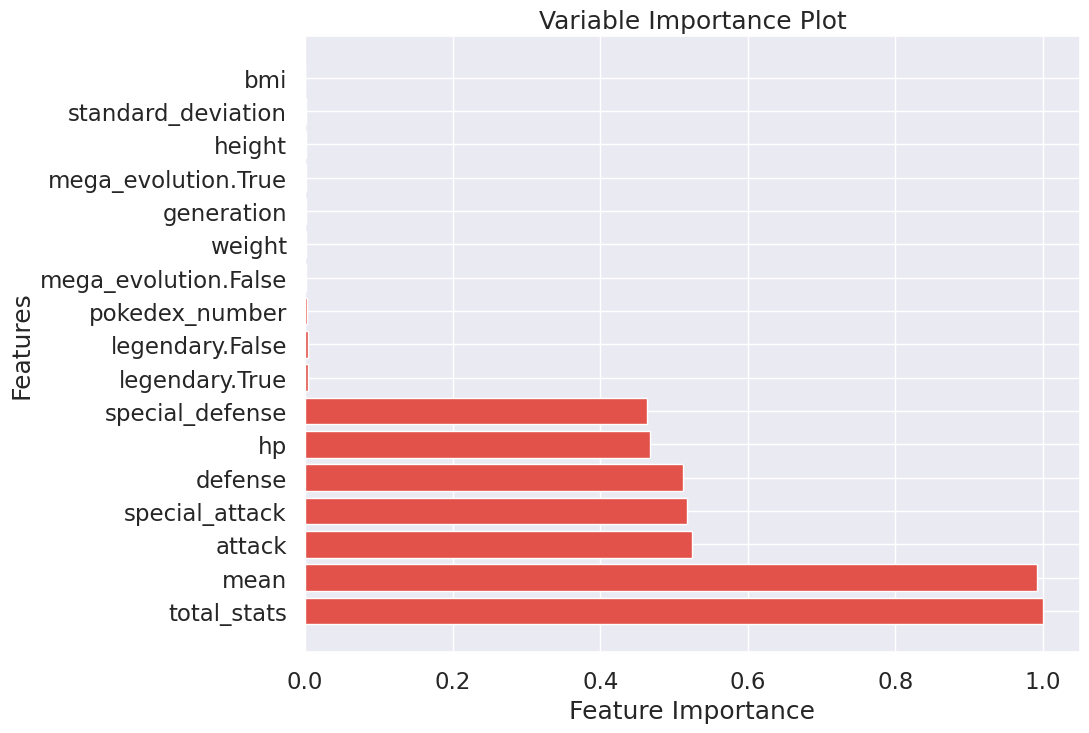

In [34]:
import matplotlib.pyplot as plt

# Assuming best_model1 is your trained model
feature_importance = best_model1.varimp()

# Extract feature names and importance values
feature_names = [row[0] for row in feature_importance]
importance_values = [row[2] for row in feature_importance]

# Print variable importance in text form
print("Variable Importance:")
for name, importance in zip(feature_names, importance_values):
    print(f"{name}: {importance}")

plt.figure(figsize=(10, 8))
plt.barh(range(len(feature_names)), importance_values, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Variable Importance Plot')
plt.show()

The "Variable Importance" output lists predictors based on their relative importance in the model, with values indicating how much each variable contributes to the model's predictive power. Here's a brief interpretation:

- **High Importance:** `total_stats` and `mean` top the list with near-perfect importance scores of 1.0 and 0.991, respectively, indicating they are the most influential predictors of the outcome.
- **Moderate Importance:** Variables like `attack`, `special_attack`, `defense`, `hp`, and `special_defense` have moderate importance scores, suggesting they significantly contribute to the model's predictions but to a lesser extent than `total_stats` and `mean`.
- **Low Importance:** The `legendary` status (both True and False), `pokedex_number`, `mega_evolution` status (both True and False), `weight`, `generation`, and `height` have very low importance scores, suggesting they have minimal impact on the model's predictions.
- **Very Low Importance:** `standard_deviation` and `bmi` have the lowest scores, indicating they contribute the least to the model's predictive ability.

Based on this analysis, focusing on the most important variables (`total_stats`, `mean`, `attack`, `special_attack`, `defense`, `hp`, `special_defense`) is advisable for model refinement and simplification. Variables with low to very low importance, such as `legendary` status, `pokedex_number`, `mega_evolution` status, `weight`, `generation`, `height`, `standard_deviation`, and `bmi`, could be considered for removal from the model. Dropping these less impactful variables can help reduce model complexity, potentially improving model performance and interpretability without significantly affecting accuracy.

***Since we are dropping from h2o dataframe, we need to do the same to pandas frame to keep our dataframes in sync.***
---

In [35]:
low_impact_features = ['height', 'standard_deviation', 'bmi', 'weight']  # List of low-impact features to remove
dfpdh2o_modified = dfpd_h2o.drop(low_impact_features, axis=1)  # Remove columns corresponding to low-impact features

dfpd_modified = dfpd.drop(low_impact_features, axis=1)

In [36]:
# Descriptive statistics
description = dfpdh2o_modified.describe()
print(description)

Rows:1118
Cols:12

,pokedex_number,hp,attack,defense,special_attack,special_defense,speed,total_stats,mean,generation,mega_evolution,legendary
type,int,int,int,int,int,int,int,int,real,int,enum,enum
mins,1.0,1.0,5.0,5.0,10.0,20.0,5.0,175.0,29.17,1.0,,
mean,446.9230769230766,70.00805008944548,80.69677996422188,74.77459749552771,73.24955277280853,72.58139534883732,69.47942754919508,440.78980322003514,73.46479427549211,4.650268336314845,,
maxs,898.0,255.0,190.0,250.0,194.0,250.0,200.0,1125.0,187.5,8.0,,
sigma,270.91558904444963,26.65642213681824,32.044482964439496,30.946356662157825,32.446931740736154,27.76516326223819,30.036549308966922,120.0531798148955,20.00897746817681,2.315773424327012,,
zeros,0,0,0,0,0,0,0,0,0,0,,
missing,0,0,0,0,0,0,0,0,0,0,0,0
0,1.0,45.0,49.0,49.0,65.0,65.0,45.0,318.0,53.0,1.0,False,False
1,2.0,60.0,62.0,63.0,80.0,80.0,60.0,405.0,67.5,1.0,False,False
2,3.0,80.0,100.0,123.0,122.0,120.0,80.0,625.0,104.17,6.0,True,False


None


*We are keeping Mega_evaulation, Generation and Pokedex Number for Identifying the pokemon and classification purposes.*
---

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Indicate which variables to compute VIF
Multic = dfpd_modified[['hp', 'attack', 'defense', 'mean', 'special_attack', 'special_defense', 'total_stats']]

# Compute VIF
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]

# Display the VIF DataFrame
print(vif)


         variables           VIF
0               hp  1.816832e+01
1           attack  3.269744e+01
2          defense  1.685662e+01
3             mean  8.267027e+08
4   special_attack  2.501585e+01
5  special_defense  2.762437e+01
6      total_stats  8.267108e+08


The provided information includes results from a Variance Inflation Factor (VIF) analysis focusing on the relationship between the `speed` dependent variable and several predictors within a dataset. Here's a concise interpretation:

### VIF Analysis:
- **High VIF Values:** `mean` and `total_stats` show extremely high VIF values (in the range of 10^8), indicating severe multicollinearity. This suggests that these variables are highly linearly related to the others.
- **Moderate to High VIF:** Other variables like `attack`, `special_defense`, and `special_attack` have VIF values greater than 10, which is typically considered the threshold for identifying problematic multicollinearity, though to a much lesser extent than `mean` and `total_stats`.


In [38]:
import statsmodels.formula.api as smf
#OLS model Library
results = smf.ols('speed ~ hp + attack + defense + mean + special_attack + special_defense + total_stats', data=dfpd).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  speed   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.159e+27
Date:                Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                        02:48:52   Log-Likelihood:                 27174.
No. Observations:                1118   AIC:                        -5.433e+04
Df Residuals:                    1110   BIC:                        -5.429e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        3.961e-13   7.94e-13      0.499      0.618   -1.16e-12    1.95e-12
hp                 -1.0000   1.15e-14   -8.7e+13      0.000      -1.000      -1.000
attack             -1.0000   1.35e-14   -7.4e+13      0.000      -1.000      -1.000
defense            -1.0000   1.03e-14  -9.74e+13      0.000      -1.000      -1.000
mean             1.663e-12   7.64e-11      0.022      0.983   -1.48e-10    1.52e-10
special_attack     -1.0000   1.29e-14  -7.75e+13      0.000      -1.000      -1.000
special_defense    -1.0000   1.37e-14  -7.28e+13      0.000      -1.000      -1.000
total_stats         1.0000   1.27e-11   7.85e+10      0.000       1.000       1.000
==============================================================================
Omnibus:                       11.446   Durbin-Watson:                   0.091
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.050
Skew:                          -0.204   Prob(JB):                      0.00242
Kurtosis:                       3.303   Cond. No.                     1.90e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The provided information includes results from an Ordinary Least Squares (OLS) regression model, focusing on the relationship between the `speed` dependent variable and several predictors within a dataset. Here's a concise interpretation:

### OLS Regression Results:
- **Perfect Fit:** The model has an R-squared and Adjusted R-squared of 1.000, indicating a perfect fit, which is highly unusual in practical scenarios and may suggest overfitting or an error in data.
- **Significant Predictors:** All variables except `mean` have coefficients of -1.000 or 1.000 with p-values of 0.000, indicating they are statistically significant predictors of `speed`. The `mean` variable, despite its high multicollinearity, shows an insignificant coefficient, suggesting it does not uniquely contribute to predicting `speed`.
- **Multicollinearity Concern:** The large condition number (1.9e+05) confirms the VIF analysis's indication of strong multicollinearity among predictors, potentially undermining the stability and interpretability of the regression coefficients.

### Conclusion:
Given the high VIF values for `mean` and `total_stats`, and considering the OLS results, it is advisable to reconsider the inclusion of these variables in the model, especially `mean`, which also shows an insignificant relationship with `speed` in the OLS model. Removing or adjusting for multicollinearity can improve model reliability and interpretability, although the unique dataset context and specific research questions should guide the final decision.

#Data Visualizations

The correlation matrix is simply a table of correlations.Each random variable in the table is correlated with each of the other values in the table. This allows us to see which pairs have the highest correlation.It also tells us if it is directly dependent or inversely by signifying the positive and negative signs.

In [39]:
#Calculating correlation matrix for all variables
dfpd_modified.corr()

,pokedex_number,hp,attack,defense,special_attack,special_defense,speed,total_stats,mean,generation,mega_evolution,legendary
pokedex_number,1.000000,0.141331,0.150420,0.133330,0.121386,0.108428,0.029521,0.171169,0.171168,0.743963,-0.146160,0.198538
hp,0.141331,1.000000,0.455184,0.311724,0.364765,0.390250,0.154411,0.651362,0.651365,0.095938,0.073995,0.340443
attack,0.150420,0.455184,1.000000,0.460897,0.361306,0.261374,0.352388,0.733059,0.733057,0.190028,0.318058,0.314123
defense,0.133330,0.311724,0.460897,1.000000,0.225045,0.544291,-0.013568,0.633318,0.633320,0.129731,0.224575,0.256792
special_attack,0.121386,0.364765,0.361306,0.225045,1.000000,0.501240,0.428341,0.728805,0.728805,0.122143,0.281605,0.350457
special_defense,0.108428,0.390250,0.261374,0.544291,0.501240,1.000000,0.200811,0.713706,0.713703,0.111741,0.216885,0.308870
speed,0.029521,0.154411,0.352388,-0.013568,0.428341,0.200811,1.000000,0.537251,0.537251,0.088492,0.176715,0.289389
total_stats,0.171169,0.651362,0.733059,0.633318,0.728805,0.713706,0.537251,1.000000,1.000000,0.186459,0.329697,0.464186
mean,0.171168,0.651365,0.733057,0.633320,0.728805,0.713703,0.537251,1.000000,1.000000,0.186453,0.329702,0.464196
generation,0.743963,0.095938,0.190028,0.129731,0.122143,0.111741,0.088492,0.186459,0.186453,1.000000,0.126167,0.144667


The provided table is a correlation matrix, showing the pairwise correlation coefficients between various variables in a dataset related to Pokémon characteristics. These coefficients range from -1 to 1, indicating the strength and direction of the linear relationship between pairs of variables. Here's a brief overview of interpreting this matrix:

- **Values Close to 1 or -1:** Indicate a strong linear relationship. A value close to 1 means a positive correlation (as one variable increases, the other tends to increase), and a value close to -1 means a negative correlation (as one variable increases, the other tends to decrease).
- **Values Close to 0:** Suggest little to no linear correlation between the variables.

Key Observations:
- **`pokedex_number` and `generation`** have a high positive correlation (0.744), suggesting that Pokémon introduced in later generations tend to have higher Pokédex numbers.
- **`total_stats` and `mean`** are perfectly correlated (1.000) with each other and highly correlated with `hp`, `attack`, `defense`, `special_attack`, and `special_defense`, indicating that these components significantly contribute to a Pokémon's overall stats.
- **`mega_evolution` and `attack`** have a moderate positive correlation (0.318), implying that Pokémon with mega evolutions tend to have higher attack stats.
- **`legendary`** shows moderate positive correlations with `total_stats`, `mean`, `hp`, `attack`, `special_attack`, and `special_defense`, suggesting legendary Pokémon generally have higher stats in these areas.

The correlation matrix is a crucial tool for understanding the relationships between variables, guiding feature selection for modeling, and identifying potential issues like multicollinearity in regression models.

*Representing the same matrix in form of heatmap where shades of blue signify inverse relation and shades of red signify direct relation.*
---
The correlation matrix with shades of blue indicating inverse (negative) relationships and shades of red indicating direct (positive) relationships aligns well with color palettes that transition smoothly between two hues. The coolwarm colormap used in the provided code snippet is designed for this purpose, where cooler colors (blues) represent lower (negative) values and warmer colors (reds) signify higher (positive) values.


This code snippet visualizes the correlation matrix of the DataFrame `dfpd` using a heatmap, which is a graphical representation of data where values are depicted by color, making it easier to see the strength and direction of correlations between variables.

Text(0.5, 1.0, 'Variable Correlation')

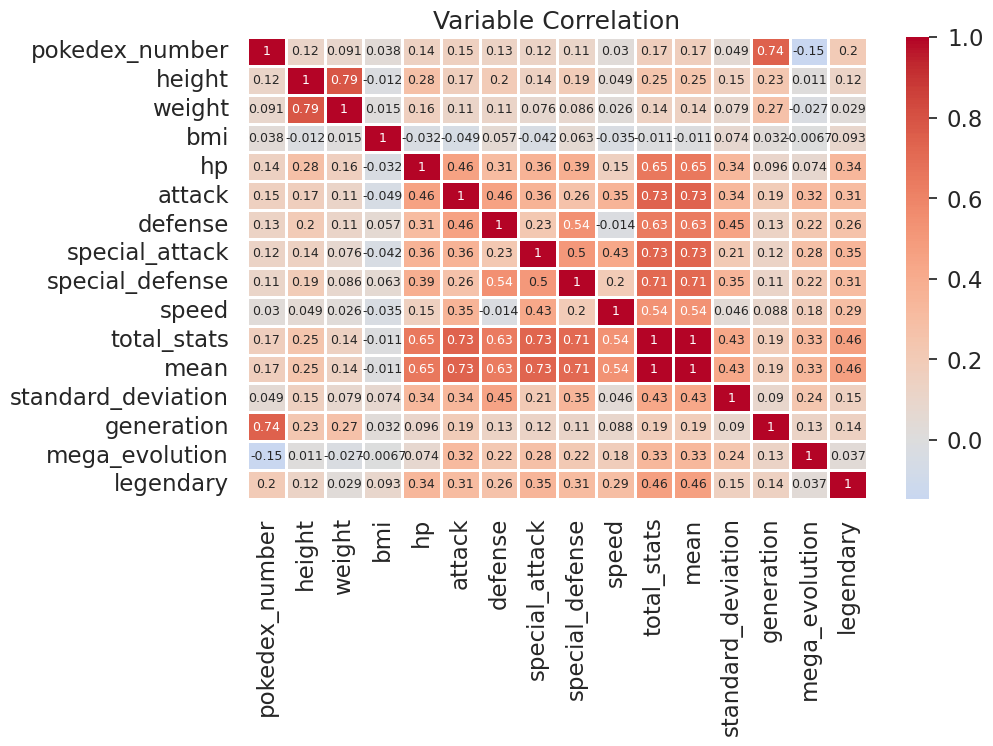

In [40]:
#Representing Matrix as a plot
from IPython.core.pylabtools import figsize
f,ax=plt.subplots(figsize=(10,6))

sns.heatmap(dfpd.corr(),center=0, linewidths=0.8,cmap='coolwarm',annot=True, annot_kws={"size": 9})
plt.title('Variable Correlation')

*Plotting all variables against other variables to see if relation exists between them. Basically it tells the same thing as correlation matrix but in a graphical way.*
---

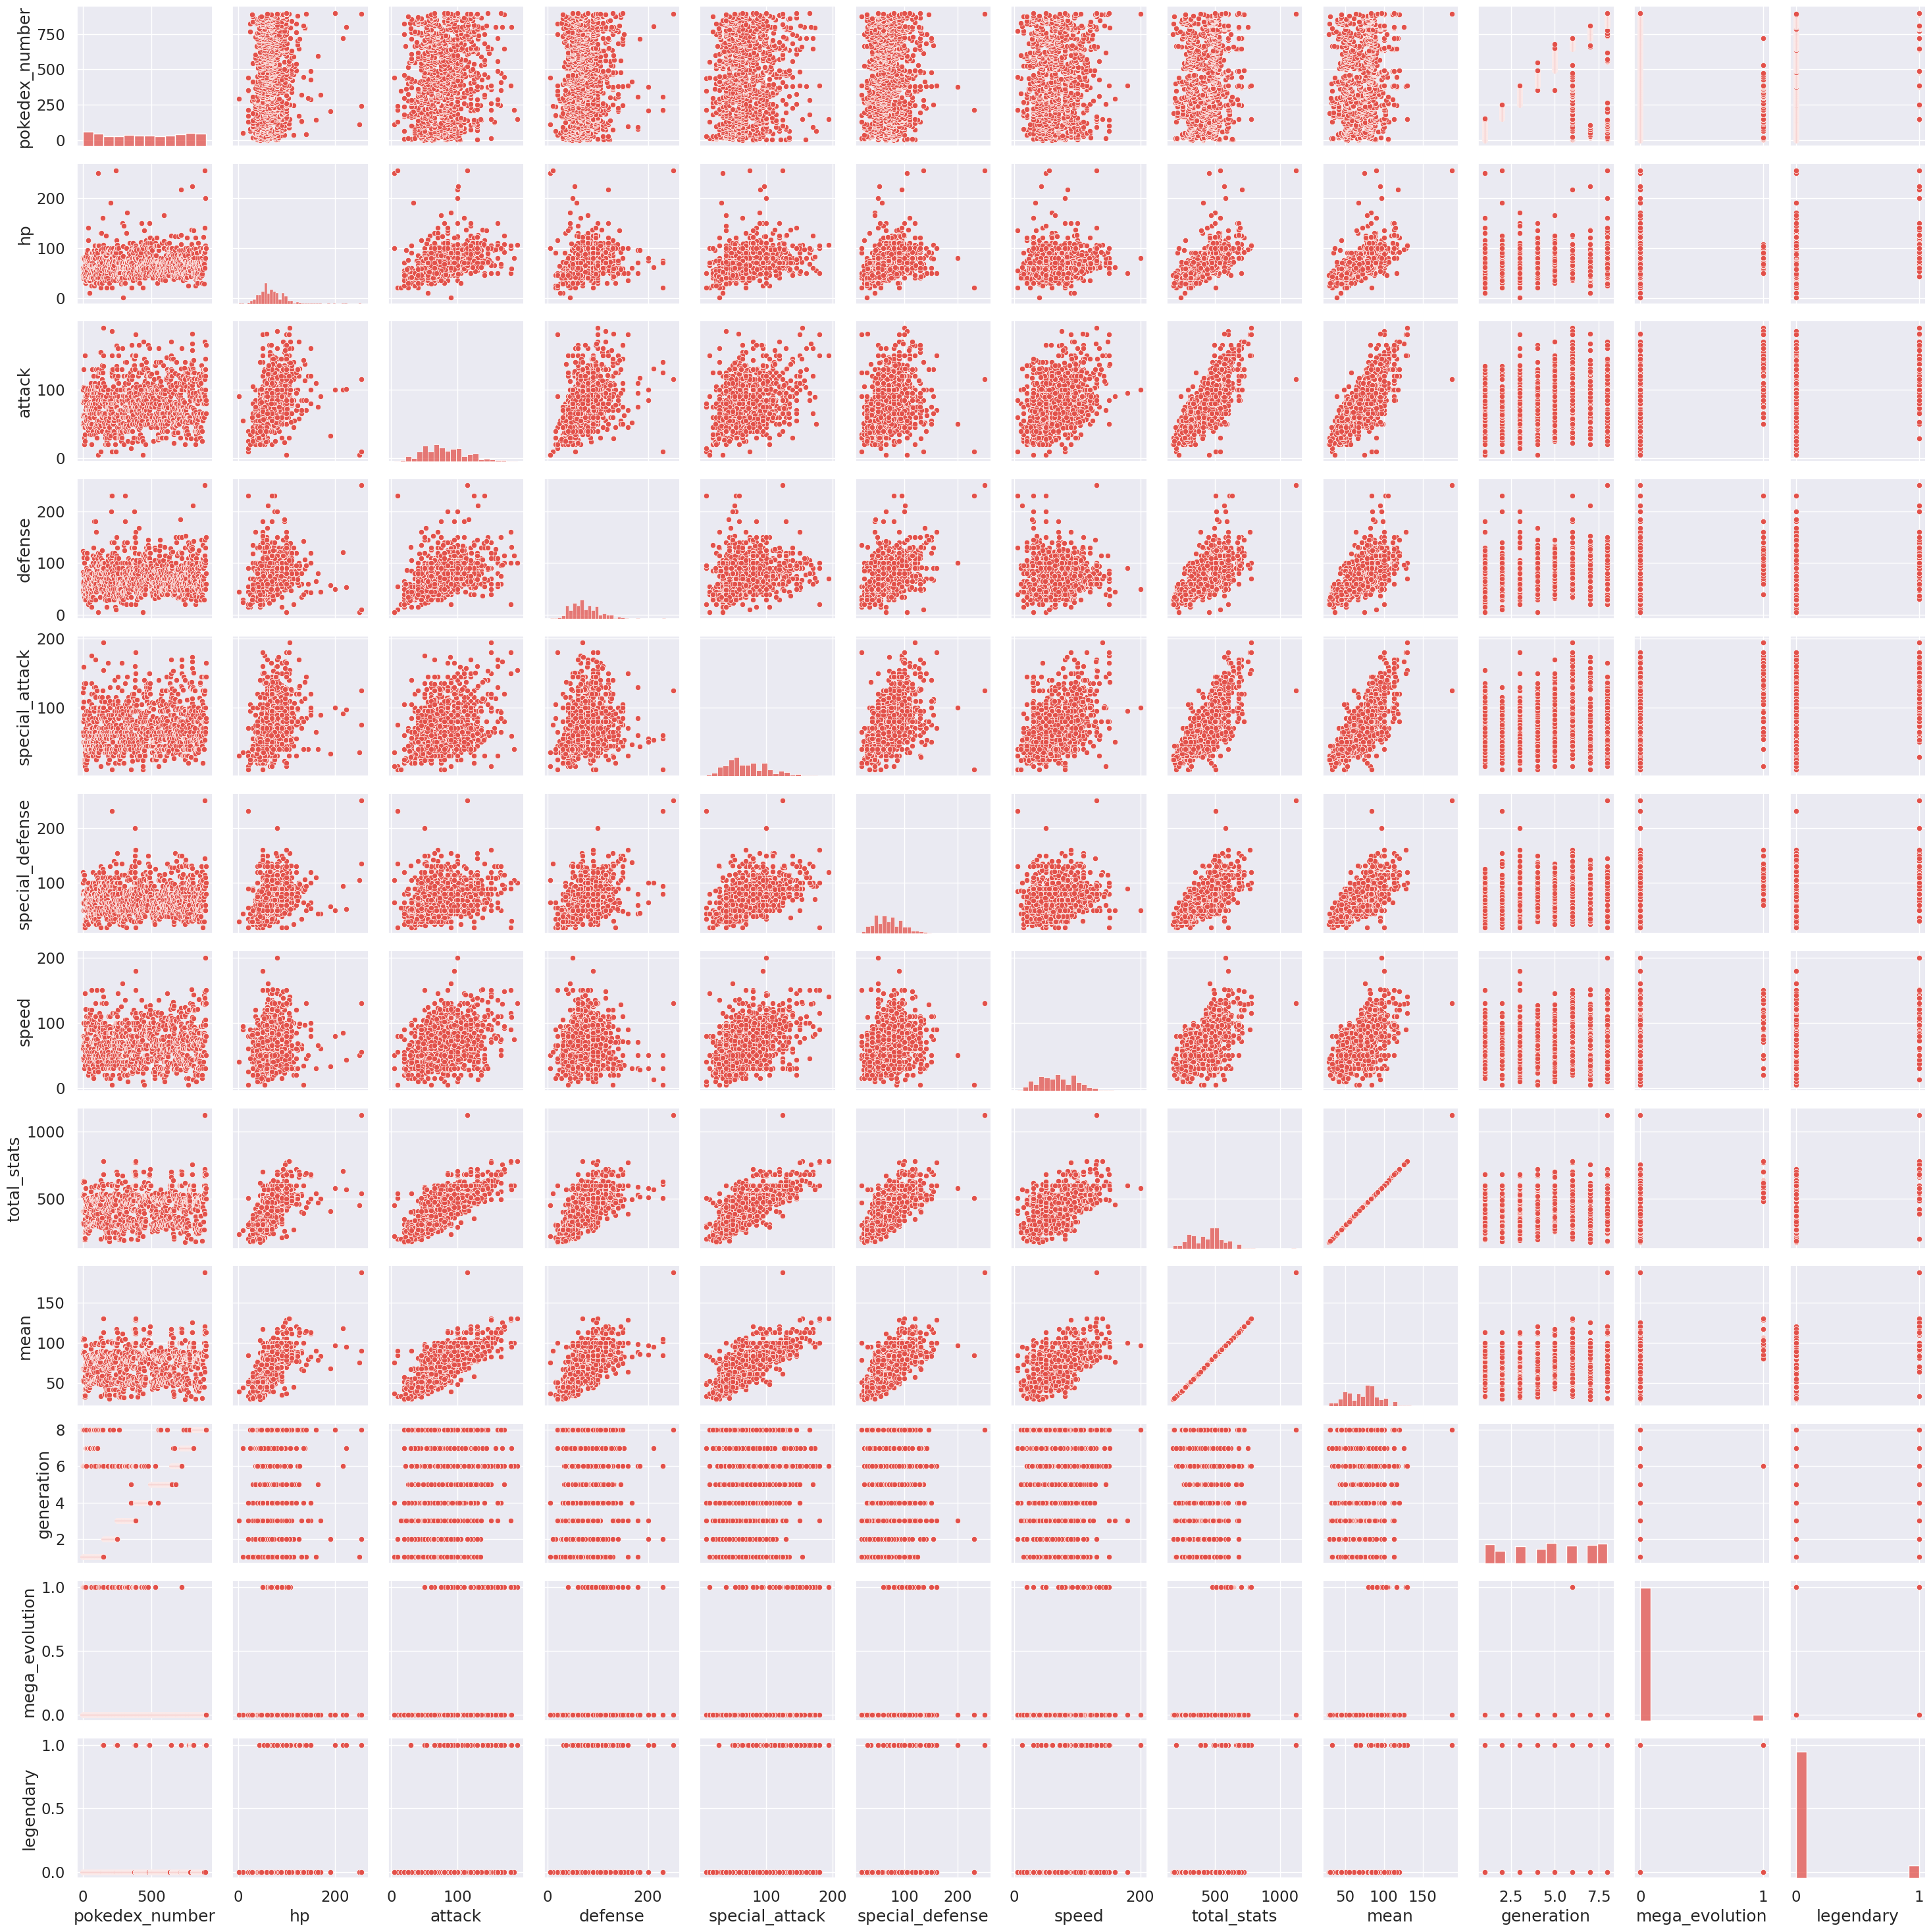

In [41]:
sns.pairplot(dfpd_modified)

When all independent variables were plotted against 'speed' variable it is observed that for'mean' and 'total_stats' roughly a linear line is obtained. So it can be concluded from this plot that variables mean and total_stats have linear relation with speed.

Conducting one last test to see if the Varibles we selected are good enough.
---

In [42]:
from sklearn.ensemble import RandomForestRegressor

# Define features and target
X = dfpd_modified[['hp', 'attack', 'defense', 'mean', 'special_attack', 'special_defense', 'total_stats']]
y = dfpd_modified['speed']

# Initialize Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. Feature '{X.columns[indices[f]]}' ({feature_importances[indices[f]]})")


Feature ranking:
1. Feature 'total_stats' (0.235892808978238)
2. Feature 'defense' (0.21900608283985273)
3. Feature 'mean' (0.202891299634372)
4. Feature 'hp' (0.1439628012833078)
5. Feature 'special_attack' (0.07881340964247381)
6. Feature 'special_defense' (0.06934176565791662)
7. Feature 'attack' (0.050091831963839074)


As we can see, Through ranking. The varibles for predicitng Speed, BMI....Special Defense, These are good for the model. We dont need to drop or manupulate further.


# **Retraining the model with the new dataframe.**
---

Lets start with the H2O and create model using the dfpd dataframe containing our feature selected variables.
  

In [43]:
# Descriptive statistics
description = dfpdh2o_modified.describe()
print(description)

Rows:1118
Cols:12

,pokedex_number,hp,attack,defense,special_attack,special_defense,speed,total_stats,mean,generation,mega_evolution,legendary
type,int,int,int,int,int,int,int,int,real,int,enum,enum
mins,1.0,1.0,5.0,5.0,10.0,20.0,5.0,175.0,29.17,1.0,,
mean,446.9230769230766,70.00805008944548,80.69677996422188,74.77459749552771,73.24955277280853,72.58139534883732,69.47942754919508,440.78980322003514,73.46479427549211,4.650268336314845,,
maxs,898.0,255.0,190.0,250.0,194.0,250.0,200.0,1125.0,187.5,8.0,,
sigma,270.91558904444963,26.65642213681824,32.044482964439496,30.946356662157825,32.446931740736154,27.76516326223819,30.036549308966922,120.0531798148955,20.00897746817681,2.315773424327012,,
zeros,0,0,0,0,0,0,0,0,0,0,,
missing,0,0,0,0,0,0,0,0,0,0,0,0
0,1.0,45.0,49.0,49.0,65.0,65.0,45.0,318.0,53.0,1.0,False,False
1,2.0,60.0,62.0,63.0,80.0,80.0,60.0,405.0,67.5,1.0,False,False
2,3.0,80.0,100.0,123.0,122.0,120.0,80.0,625.0,104.17,6.0,True,False


None


Here, we can see that our h2o dataframe is updated with the changes and now we can proceed further with creating model.

In [44]:

import h2o

# Initialize H2O cluster
h2o.init()

# Define the percentages for train and validation sets
pct_train = 0.70
pct_val = 0.15

# Split the data into train, validation, and test sets

dfpdh2o_modified_train, dfpdh2o_modified_val, dfpdh2o_modified_test = dfpdh2o_modified.split_frame(
    ratios=[pct_train, pct_val], seed=1234)

# Print the number of rows in each set
print("Training set:", dfpdh2o_modified_train)
print("Validation set:", dfpdh2o_modified_val)
print("Test set:", dfpdh2o_modified_test)


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,5 mins 14 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_13d634
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.131 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Training set:   pokedex_number    hp    attack    defense    special_attack    special_defense    speed    total_stats    mean    generation  mega_evolution    legendary
               2    60        62         63                80                 80       60            405   67.5              1  False             False
               3    80       100        123               122                120       80            625  104.17             6  True              False
               3    80        82         83               100                100       80            525   87.5              8  False             False
               4    39        52         43                60                 50       65            309   51.5              1  False             False
               5    58        64         58                80                 65       80            405   67.5              1  False             False
               6    78        84         78               109         

In [45]:
X1=dfpdh2o_modified.columns
print(X1)

['pokedex_number', 'hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed', 'total_stats', 'mean', 'generation', 'mega_evolution', 'legendary']


In [46]:
#Seperate Dependent variable from Independent variable
y1_numeric ='speed'
X1.remove(y1_numeric)
print(X1)


['pokedex_number', 'hp', 'attack', 'defense', 'special_attack', 'special_defense', 'total_stats', 'mean', 'generation', 'mega_evolution', 'legendary']


# **Running the model with the updated df**

After dropping specific columns and retraining your model with H2O's AutoML, the Stacked Ensemble model shows impressive results. The model predominantly relies on GLM (Generalized Linear Model) as its base learner, given the information that it's the only type of base model used in this ensemble. Here's a breakdown of the key metrics reported:

### Model Performance on Training Data:
- **MSE (Mean Squared Error):** 0.224, a low value indicating close predictions to actual values.
- **RMSE (Root Mean Squared Error):** 0.473, which is low, reflecting accurate predictions.
- **MAE (Mean Absolute Error):** 0.363, showing small average errors.
- **RMSLE (Root Mean Squared Logarithmic Error):** 0.0139, indicating good performance on percentage errors.
- **R^2 (Coefficient of Determination):** 0.9997, nearly perfect, suggesting the model explains almost all variance in the target variable.

### Model Performance on Validation Data:
- **MSE:** 0.252, slightly higher than the training data but still low.
- **RMSE:** 0.502, indicating accurate predictions on unseen data.
- **MAE:** 0.366, consistent with the training data's performance.
- **RMSLE:** 0.0098, an excellent score that's even better than the training data.
- **R^2:** 0.9997, showing the model's predictions are almost perfectly aligned with the actual values.

### Cross-Validation Metrics:
- **MSE:** 0.336, the highest among the three sets but still indicating good model accuracy.
- **RMSE:** 0.580, reflecting consistent model performance.
- **MAE:** 0.437, suggesting slightly larger but still small average errors across folds.
- **RMSLE:** 0.0161, slightly higher, showing a bit more variation in percentage errors.
- **R^2:** 0.9996, slightly lower than training and validation but still indicative of excellent model fit.

### Observations:
- The **R^2 values** across all data splits are exceptionally high, indicating that the model fits the data very well, explaining almost all the variability in the target variable with very little error.
- The **error metrics (MSE, RMSE, MAE, and RMSLE)** are consistently low across training, validation, and cross-validation, demonstrating the model's ability to make accurate predictions.
- The model's reliance on **GLM as the base model** suggests that linear relationships between the predictors and the target variable are significant and well-captured by this approach.
- The **cross-validation metrics** provide a more generalized view of the model's performance, considering different subsets of the data, and they align closely with the training and validation results, indicating robustness.

### Conclusion:
Dropping certain columns seems to have refined the model, focusing on the most impactful variables and leading to an ensemble that performs exceptionally well across all considered metrics. This streamlined model not only retains high accuracy but also likely benefits from increased interpretability and reduced complexity.

In [47]:
aml1 = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [ ]:
aml1.train(x=X1,y=y1_numeric,training_frame=dfpdh2o_modified_train, validation_frame=dfpdh2o_modified_val)

AutoML progress: |
02:49:51.541: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

█████████████████████████████████████████████████████████████

The updated model leaderboard from H2O AutoML after dropping some columns shows a variety of models, including Stacked Ensembles, a Generalized Linear Model (GLM), Deep Learning, and XGBoost models, ranked by their performance metrics. Here's a brief overview and interpretation:

### Key Performance Metrics:
- **RMSE (Root Mean Squared Error):** Measures the model's prediction error. Lower values indicate better performance.
- **MSE (Mean Squared Error):** Similar to RMSE but squared. It emphasizes larger errors.
- **MAE (Mean Absolute Error):** Represents the average absolute difference between predicted and actual values. Less sensitive to outliers compared to RMSE and MSE.
- **RMSLE (Root Mean Squared Logarithmic Error):** Useful when you don't want to penalize large differences when both predicted and actual values are large numbers.
- **Mean Residual Deviance:** Similar to MSE but for models that use a deviance measure for dispersion. It's the mean squared difference between the observed and predicted values.

### Model Comparisons:
- The **StackedEnsemble_BestOfFamily_1_AutoML_2_20240219_175009** model performs best among the listed models based on RMSE, with a value of 0.579542, indicating it has the lowest prediction error.
- **GLM_1_AutoML_2_20240219_175009** shows significantly higher RMSE and MAE values compared to the Stacked Ensemble models, suggesting it is less accurate.
- **DeepLearning_1_AutoML_2_20240219_175009** and **XGBoost_grid_1_AutoML_2_20240219_175009_model_16** models exhibit much higher RMSE values, indicating poorer performance on this particular dataset, with the Deep Learning model having an RMSE of 5.94108, and the XGBoost model showing an RMSE of 13.0612.
- Notably, the Deep Learning model's RMSLE is not available (nan), which might indicate issues with its predictions, such as predicting negative values for a metric that should only be positive.

### Conclusion:
The Stacked Ensemble models, particularly **StackedEnsemble_BestOfFamily_1_AutoML_2_20240219_175009**, demonstrate superior performance after dropping less informative columns, highlighting the effectiveness of feature selection in improving model accuracy. The wide range of RMSE values across different model types underscores the importance of model comparison and selection in machine learning workflows. This iterative process of feature selection, model training, and evaluation helps in refining the predictive model to achieve better accuracy and reliability.

In [ ]:
print(aml1.leaderboard)

This creates a dictionary that maps model IDs to their indices based on their appearance in the H2O AutoML leaderboard, with a focus on Stacked Ensemble models and Generalized Linear Models (GLM).

tldr. Give index to models.

In [ ]:
# Initialize variables
model_index = 0
glm_index = 0
models_dict = {}

# Assuming aml is your AutoML object
aml1_leaderboard_dfpdh2o_modified = aml1.leaderboard.as_data_frame()

# Iterate through the leaderboard
for m in aml1_leaderboard_dfpdh2o_modified['model_id']:
    # Assign index for StackedEnsemble models
    if 'StackedEnsemble' in m:
        models_dict[m] = model_index
        model_index += 1
    # Assign index for GLM model
    elif 'GLM' in m:  # Use elif to ensure GLM is processed separately
        models_dict[m] = glm_index
        glm_index += 1  # Increment glm_index here

# Output the dictionary with model IDs and their assigned index
for model_id, index in models_dict.items():
    print(f"{model_id}: {index}")


Finding the best model
---

This is designed to find and print the ID of the "best" model from a dictionary that maps model IDs to indices, where the "best" model is determined by having the lowest index. This approach assumes that models with lower indices are considered to perform better or are more preferable for some reason.

In [ ]:
# Find the model with the lowest index (assuming lower index implies better performance)
best_model1_index = min(models_dict.values())

# Search for the model ID corresponding to the lowest index
best_model_id = None
for model_id, index in models_dict.items():
    if index == best_model1_index:
        best_model_id = model_id
        break

# Output the ID of the best model
print("Best Model ID:", best_model_id)


This checks what algorithms are used.

In [ ]:
# Initialize a list to store the algorithms used in the models
algorithms_used = []

# Iterate through the model IDs in models_dict
for model_id in models_dict.keys():
    # Extract the algorithm from the model ID
    algorithm = model_id.split("_")[0]  # Assumes algorithm name is at the beginning of the model ID
    # Add the algorithm to the list if it's not already present
    if algorithm not in algorithms_used:
        algorithms_used.append(algorithm)

# Output the list of algorithms used
print("Algorithms used:", algorithms_used)


In [ ]:
best_model = h2o.get_model(best_model_id)
print("Best Model Type:", best_model.algo)

Here, we find out the best model we have is stackedensemble, but just to be sure and confirm our analysis, we will further compare the rmse.


This identifies the top 3 performing models based on RMSE (Root Mean Squared Error) from an H2O AutoML leaderboard, focusing specifically on Stacked Ensembles and Generalized Linear Models (GLM). The process involves:

1. **Initialization:**
   - `best_rmse` is initialized as a list containing three positive infinity values to store the three lowest RMSEs found.
   - `best_model_id` is initialized as a list of three `None` values to hold the IDs of the models corresponding to the best RMSEs.

2. **Model Search:**
   - The code iterates through each model in the `aml1_leaderboard_dfpdh2o_modified` DataFrame, checking if the model is either a Stacked Ensemble or GLM (`target_models` list).
   - If a model's RMSE is lower than any of the current top 3 RMSEs stored in `best_rmse`, the code updates both the `best_rmse` and `best_model_id` lists to include this new model, ensuring only the top 3 models (based on lowest RMSE) are kept.

3. **Output Top 3 Models:**
   - Prints the model IDs and their corresponding RMSEs for the top 3 models identified.

4. **Select Best Model:**
   - The first model in the `best_model_id` list, which corresponds to the lowest RMSE, is considered the best model.
   - Prints the ID of the best model to be used for further analysis or predictions.

By focusing on RMSE, a standard measure of accuracy for regression models, this approach ensures the selection of models that are most effective at predicting outcomes close to the actual observed values. This method is particularly useful in scenarios where performance is critical, and there's a need to quickly identify the most accurate models produced by AutoML for further evaluation or deployment.

In [ ]:
best_rmse = [float('inf')] * 3  # Initialize with positive infinity
best_model_id = [None] * 3

# Models to search for
target_models = ['StackedEnsemble', 'GLM']

# Iterate through the leaderboard
for model_id, rmse in zip(aml1_leaderboard_dfpdh2o_modified['model_id'], aml1_leaderboard_dfpdh2o_modified['rmse']):
    # Check if the model is one of the target models
    if any(model_type in model_id for model_type in target_models):
        # Update best_rmse and best_model_id if the current model has lower RMSE
        for i, val in enumerate(best_rmse):
            if rmse < val:
                best_rmse.insert(i, rmse)
                best_model_id.insert(i, model_id)
                best_rmse = best_rmse[:3]  # Keep only top 3 values
                best_model_id = best_model_id[:3]  # Keep only top 3 models
                break

# Print the top 3 models with their corresponding RMSE values
print("Top 3 Models with Lowest RMSE:")
for rmse, model_id in zip(best_rmse, best_model_id):
    print("Model ID:", model_id, "- RMSE:", rmse)

# Select the best model among the top 3 based on the lowest RMSE
best_model_id = best_model_id[0]  # The first model in the list has the lowest RMSE

print("\nBest Model to Pick:", best_model_id)


In [ ]:
# Get the stacked ensemble model from aml1
stacked_ensemble_model_aml1 = aml1.leader

# Get base models from aml1's stacked ensemble
base_models_aml1 = stacked_ensemble_model_aml1.base_models

# Print the base models from aml1
print("Base models from aml1:")
print(base_models_aml1)


The output details provided come from an H2O AutoML session, specifically focusing on the performance and characteristics of the best model identified as `StackedEnsemble_BestOfFamily_1_AutoML_2_20240219_175009`. This model is a Stacked Ensemble that uses cross-validation as its stacking strategy and includes models of different families, primarily leveraging a Generalized Linear Model (GLM) as the metalearner.

### Model Performance Metrics:
- **MSE (Mean Squared Error):** Measures the average of the squares of the errors or deviations. For this model, MSE values are reported for training, validation, and cross-validation datasets, with the lowest being 0.224 on training data, indicating a close fit to the training data points.
- **RMSE (Root Mean Squared Error):** The square root of MSE, providing a measure of the magnitude of the error. The cross-validation RMSE of 0.579542 suggests a relatively tight fit around the dataset's actual values.
- **MAE (Mean Absolute Error):** The average of the absolute errors, showing an average deviation from the actual values without considering direction. The MAE values across different datasets highlight the model's accuracy, with a cross-validation MAE of 0.436772.
- **RMSLE (Root Mean Squared Logarithmic Error):** A variation of RMSE that is particularly useful when dealing with large ranges of values. The model shows an RMSLE of 0.0160611 on cross-validation, indicating good performance on logarithmic scale.
- **R^2 (Coefficient of Determination):** Indicates the proportion of the variance in the dependent variable predictable from the independent variables, with a value close to 1 (0.999749 on training data) suggesting a very high level of predictability.

### Model Details:
- **Stacking Strategy:** Utilizes cross-validation to generate out-of-sample predictions that the metalearner model uses.
- **Number of Base Models:** Indicates that only 1 out of 3 possible models was used, specifically a GLM model as the metalearner.
- **Metalearner:** The GLM used to combine base model predictions is critical in interpreting the final ensemble predictions.
- **Cross-Validation Metrics Summary:** Provides detailed statistics on the model's performance across multiple folds, ensuring the model's generalizability across different data samples.

### Interpretation:
This Stacked Ensemble model demonstrates exceptionally high predictive accuracy and generalizability, as evidenced by its performance metrics. The use of a GLM metalearner suggests that linear relationships between the predictors and the target variable significantly contribute to the model's predictive capabilities. The high R^2 values across training and validation datasets reinforce the model's effectiveness in capturing variance in the target variable. Given these results, this model stands out as a robust solution for predicting outcomes based on the given predictors, with its reliability underscored by cross-validation metrics.

In [ ]:
import h2o
from h2o.automl import get_leaderboard

lb = aml1.leaderboard
lb.head(rows=lb.nrows)


In [ ]:
best_model = aml1.get_best_model()
print(best_model)

How did AutoML pick this model?
The difference between the first 3 models in the leaderboard is that the first two are ensemble models that combine multiple models to make predictions, while the third is a single XGBoost model. The Stacked Ensemble models use a combination of models to make predictions and generally result in better performance compared to a single model.

The model that was probably chosen as the best model is the "StackedEnsemble_AllModels_1_AutoML_1_20230214_162143" model because it has the lowest RMSE, which is a commonly used measure of the prediction error in regression problems. However, it is important to evaluate the model based on other metrics and use cross-validation to get a more accurate estimate of the model's performance on unseen data.

Evaluating the best model on a holdout test set using the same evaluation metrics shown above.
---
The `ModelMetricsRegressionGLM` for the `StackedEnsemble` model reported on the test data shows excellent performance metrics, indicating the model's effectiveness in predicting the target variable with high accuracy. Here's a summary and interpretation of the key metrics reported:

- **MSE (Mean Squared Error):** At 0.29577260318379905, it measures the average of the squares of the errors between predicted and actual values, indicating a low error magnitude on the test data.
- **RMSE (Root Mean Squared Error):** With a value of 0.5438497983669747, it further quantifies the model's prediction error, providing a measure that is in the same units as the target variable. A lower RMSE value here suggests that the model's predictions are close to the actual values.
- **MAE (Mean Absolute Error):** At 0.4038530254087, it represents the average absolute difference between the predicted values and the actual values, showing the model's predictive precision without considering the direction of the error.
- **RMSLE (Root Mean Squared Logarithmic Error):** The value of 0.010156634146626585 implies the model's performance in predicting the magnitude of the target variable accurately, especially useful for targets with exponential growth.
- **Mean Residual Deviance:** Similar to MSE, at 0.29577260318379905, it's another measure of the goodness of fit, indicating the model's accuracy on the test data.
- **R^2 (Coefficient of Determination):** With a value of 0.9996594163363852, it shows a very high proportion of variance in the target variable is predictable from the input variables, indicating an almost perfect fit.
- **Null Deviance vs. Residual Deviance:** The significant reduction from the null deviance (146992.1513721767) to the residual deviance (49.98556993806204) demonstrates the model's ability to explain a large portion of the variability in the target variable.
- **AIC (Akaike Information Criterion):** At 279.73144866976986, it provides a measure of the model quality, balancing the model fit and complexity; the lower the AIC, the better the model relative to others.

### Conclusion:
Evaluating this `StackedEnsemble` model on the test data confirms its robustness and reliability in making accurate predictions. The low error metrics (MSE, RMSE, MAE) and high R^2 value underscore the model's precision and the effectiveness of the ensemble approach in capturing complex patterns in the data. The model's performance is indicative of a well-fitted model that generalizes well to unseen data, making it a potent tool for predictive tasks within its trained context.

In [ ]:
best_model.model_performance(dfpdh2o_modified_test)


Explainability

H2O's AutoML `explain` method offers a comprehensive and easy-to-use approach for understanding the global explainability of models. It synthesizes complex model insights into more accessible and interpretable formats, making it easier for users to grasp how the model makes its predictions. Here's a breakdown of how the `explain` method works, particularly when focusing on variable importance:

### Variable Importance (`varimp`):
- **What It Shows:** Variable importance provides a ranking of the input features based on how much they contribute to the model's predictions. It helps identify which features are most influential in predicting the target variable.
- **How It's Useful:** Understanding variable importance can guide feature selection and engineering, inform domain understanding, and ensure model transparency. It helps stakeholders identify which factors are driving the model's decisions, which can be crucial for trust and actionable insights.


In [ ]:
explain_model = aml1.explain(frame = dfpdh2o_modified_test, figsize = (8,6),include_explanations=['varimp'])


Interpreting feature importance through Partial Dependence Plots (PDPs) using H2O AutoML's `explain` method provides insights into how the values of a feature affect the model's predictions, on average, across the dataset. Here's a detailed explanation:
---

### Partial Dependence Plots (PDP):
- **What They Show:** PDPs illustrate the relationship between a feature (or a set of features) and the predicted outcome, holding all other features constant. This visualization helps to understand the effect of a single feature on the prediction, regardless of the values of other features.
- **How They're Useful:** PDPs are particularly valuable for identifying patterns and trends in the predictions related to specific features. They can reveal whether the relationship between the feature and the target variable is linear, monotonic, or more complex. For example, a PDP can show how increasing a feature's value impacts predictions, highlighting thresholds or saturation points beyond which changes in the feature value have diminishing effects.

### Outcome:
Executing this code generates PDPs for the features in the model, each plot showing the average effect of a feature on the model's prediction. This graphical representation allows you to quickly grasp how changes in a feature's value are likely to impact the predicted outcome, providing a straightforward way to interpret the model's reliance on specific features.

### Conclusion:
Partial Dependence Plots are a critical tool for model interpretability, especially in complex models where the direct influence of features on predictions isn't immediately clear. They provide a window into the model's decision-making process, helping to validate whether the model's behavior aligns with domain knowledge and expectations. By using H2O AutoML's `explain` method to generate PDPs, you can enhance the transparency and trustworthiness of your predictive models, making them more understandable and actionable for stakeholders.

In [ ]:
explain_model = aml1.explain(frame = dfpdh2o_modified_test, figsize = (4,6),include_explanations=['pdp'])


#**Local explainability**

In H2O AutoML, it focuses on interpreting predictions for individual instances, providing insights into why the model made a specific prediction for a single row or observation.

This level of detail is particularly useful for understanding model decisions on a case-by-case basis, which can be critical in applications where individual predictions need to be explained, such as in credit scoring or medical diagnosis. Here's how the `explain_row` method works for local explainability:

### Local Explainability with `explain_row`:
- **Purpose:** While global explainability offers an overview of how features generally affect model predictions, local explainability dives into the specifics of how the model arrived at a particular prediction for a single instance.

### Outcome:
The `explain_row` method generates visual explanations that might include, depending on the model and available data:
- **Feature Importance for the Specific Prediction:** Highlights which features were most influential for the prediction of the specified row, helping to understand the driving factors behind the decision.
- **SHAP Values:** Offer a detailed decomposition of the prediction, showing the contribution of each feature to the deviation from the baseline prediction. SHAP values can clarify both the direction and magnitude of a feature's impact on the specific prediction.
- **Decision Plots:** For tree-based models, decision plots can trace the path taken through the model's structure to arrive at the prediction, showing feature interactions and thresholds that led to the decision.

### Conclusion:
Local explainability with `explain_row` in H2O AutoML provides a powerful tool for dissecting and understanding model predictions at the individual level.

By focusing on specific instances, stakeholders can assess the model's reliability and accuracy in real-world applications, ensuring that predictive models are both effective and understandable.

In [ ]:
aml1.explain_row(frame = dfpdh2o_modified_test, row_index = 15, figsize = (8,6), exclude_explanations = "leaderboard")

# **Checking if assumptions violated**
For linear regression some of the assumptions are:

- There needs to be linear relation between the independent and dependent variable.

- Homoscedasticity which means normality of the error distribution.The plot for residuals against target variable should be normally distributed.

- Thirdly, linear regression assumes that there is little or no multicollinearity in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other.

- There should be no or little auto correlation. One way to test this is by Durbin-Watson test. The values should be brtween 1.5-2.5 for no autocorrelation.

The histogram below shows the distribution of residuals from a model on both the training and validation datasets. Here's how it relates to the linear regression assumptions you've listed:

1. **Linear Relationship:** This assumption requires that the relationship between independent and dependent variables be linear. The histogram alone doesn't provide information about the linearity of the model; you would need to plot the actual vs. predicted values or look at residual vs. predicted plots to assess linearity.

2. **Homoscedasticity and Normality of Errors:** Ideally, the residuals should be randomly scattered around zero without forming any discernible patterns. The histogram shows the residuals are centered around zero for both training and validation sets, which is a good sign. However, they seem to have a slight bimodal distribution, especially the validation residuals, which could be a sign of non-normality or heteroscedasticity. A QQ plot or a formal statistical test like the Shapiro-Wilk test would provide more conclusive evidence of normality.

3. **No Multicollinearity:** Multicollinearity pertains to the independence of explanatory variables. It is not something that can be assessed from residual plots; instead, you would use statistics like Variance Inflation Factor (VIF) or correlation matrices to check for multicollinearity.

4. **No Autocorrelation:** Autocorrelation refers to the residuals being independent of each other. It's commonly assessed in time-series data. The histogram doesn't provide information about autocorrelation. Instead, you would use the Durbin-Watson statistic or plot residuals against time or their lagged values to assess this.

The code is for fitting a generalized linear model using H2O, followed by extracting and plotting the residuals for the training and validation datasets. The histograms are useful for visualizing the distribution of residuals and checking for signs of non-normality or heteroscedasticity.


In [ ]:
#Seperating the predictor and target variables
A=dfpd_modified.drop(['speed'],axis=1)
B=dfpd_modified['speed']


In [ ]:
import h2o
from h2o.estimators import H2OGeneralizedLinearEstimator

# Initialize H2O
h2o.init()

# Define features and target
features = ['hp', 'attack', 'defense', 'mean', 'special_attack', 'special_defense', 'total_stats']
target = 'speed'

# Fit the model
model = H2OGeneralizedLinearEstimator()
model.train(x=features, y=target, training_frame=dfpdh2o_modified_train, validation_frame=dfpdh2o_modified_val)

# Get model performance on training and validation datasets
train_performance = model.model_performance(train=True)
valid_performance = model.model_performance(valid=True)

# Print model performance metrics
print("Training RMSE:", train_performance.rmse())
print("Validation RMSE:", valid_performance.rmse())

# Extract residuals
train_resid = model.predict(dfpdh2o_modified_train)['predict'] - dfpdh2o_modified_train[target]
valid_resid = model.predict(dfpdh2o_modified_val)['predict'] - dfpdh2o_modified_val[target]

# Plot residuals
import matplotlib.pyplot as plt

plt.hist(train_resid.as_data_frame().values, bins=30, alpha=0.5, label='Train Residuals')
plt.hist(valid_resid.as_data_frame().values, bins=30, alpha=0.5, label='Validation Residuals')
plt.legend()
plt.show()


### **Homoscedasticity Assessment:**

Homoscedasticity means that the variance of the errors should be constant across all levels of the independent variables.


The code snippets below illustrate several steps in evaluating the assumptions of linear regression, specifically focusing on homoscedasticity, which is the assumption that the residuals (differences between observed and predicted values) are equally distributed across all levels of the independent variables.

---



To assess homoscedasticity:

1. **Residuals vs. Predicted Values Plot:**
   - Plots of residuals against predicted values are created for the training, validation, and test sets.
   - Ideally, the points should be randomly dispersed around the horizontal line at zero, without any distinct patterns or funnels. This would indicate that the variance of the errors is constant (homoscedasticity).

2. **Histograms of Residuals:**
   - Histograms supplemented by Kernel Density Estimation (KDE) plots show the distribution of residuals for training, validation, and test sets.
   - If the residuals are normally distributed and centered around zero with similar spreads across the datasets, this supports the assumption of homoscedasticity.
---
### Interpretation:
- **Scatter Plots of Residuals:** If there is a pattern in the residuals, such as a funnel shape where the spread of residuals increases with the predicted value, this suggests heteroscedasticity, which violates the linear regression assumption.
- **Histograms and KDE Plots:** If the residuals show a symmetric distribution around zero and resemble a normal distribution, this is a good sign. However, if the residuals are skewed or show multiple peaks, this might indicate issues with the model such as non-linearity or outliers affecting the variance of residuals.
---
### Code Details:
- You're using `H2OGeneralizedLinearEstimator` from the H2O library to train a linear regression model.
- You're correctly extracting the residuals by subtracting the actual values from the model's predictions.
- You're using Matplotlib and Seaborn to visualize the residuals and the distribution of the 'speed' variable across different datasets.
---
### Improvements:
- To further validate homoscedasticity, you could use statistical tests such as Breusch-Pagan or White's test.
- Ensure that the residuals have a mean of zero across the datasets, as indicated by the red dashed line in the histograms. Non-zero mean may indicate bias in the model predictions.
- Check the Durbin-Watson statistic to assess autocorrelation among residuals, which should not be present in a well-fitted linear regression model.
---
In summary, your approach is on the right track for assessing homoscedasticity, and the visualizations will help in diagnosing any violations of this assumption. Further statistical testing can provide additional confirmation.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the latest trained H2O model named best_model

# Get predictions for the training and validation sets using the latest model
train_predictions = best_model1.predict(dfpdh2o_modified_train).as_data_frame()
valid_predictions = best_model1.predict(dfpdh2o_modified_val).as_data_frame()

# Extract residuals for the training and validation sets using the latest model
train_residuals = train_predictions['predict'].values - dfpdh2o_modified_train['speed'].as_data_frame().values.flatten()
valid_residuals = valid_predictions['predict'].values - dfpdh2o_modified_val['speed'].as_data_frame().values.flatten()

# Check sizes of arrays
print("Train predictions size:", len(train_predictions))
print("Train residuals size:", len(train_residuals))

# Plot residuals against actual values for training set
plt.scatter(train_predictions['predict'], dfpdh2o_modified_train['speed'].as_data_frame(), color='blue', label='Training Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted Values vs Actual Values (Training Set)')
plt.plot([dfpdh2o_modified_train['speed'].min(), dfpdh2o_modified_train['speed'].max()], [dfpdh2o_modified_train['speed'].min(), dfpdh2o_modified_train['speed'].max()], 'r--')
plt.legend()
plt.show()

# Plot residuals against actual values for validation set
plt.scatter(valid_predictions['predict'], dfpdh2o_modified_val['speed'].as_data_frame(), color='green', label='Validation Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted Values vs Actual Values (Validation Set)')
plt.plot([dfpdh2o_modified_val['speed'].min(), dfpdh2o_modified_val['speed'].max()], [dfpdh2o_modified_val['speed'].min(), dfpdh2o_modified_val['speed'].max()], 'r--')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Assuming you have the latest trained H2O model named best_model1

# Get predictions for the training, validation, and test sets using the latest model
train_predictions = best_model1.predict(dfpdh2o_modified_train).as_data_frame()
valid_predictions = best_model1.predict(dfpdh2o_modified_val).as_data_frame()
test_predictions = best_model1.predict(dfpdh2o_modified_test).as_data_frame()

# Extract residuals for the training, validation, and test sets using the latest model
train_residuals = train_predictions['predict'].values - dfpdh2o_modified_train['speed'].as_data_frame().values.flatten()
valid_residuals = valid_predictions['predict'].values - dfpdh2o_modified_val['speed'].as_data_frame().values.flatten()
test_residuals = test_predictions['predict'].values - dfpdh2o_modified_test['speed'].as_data_frame().values.flatten()

# Plot residuals for training set
plt.figure(figsize=(10, 6))
plt.scatter(train_predictions['predict'], train_residuals, color='blue', label='Training Set')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Training Set)')
plt.legend()
plt.show()

# Plot residuals for validation set
plt.figure(figsize=(10, 6))
plt.scatter(valid_predictions['predict'], valid_residuals, color='green', label='Validation Set')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Validation Set)')
plt.legend()
plt.show()

# Plot residuals for test set
plt.figure(figsize=(10, 6))
plt.scatter(test_predictions['predict'], test_residuals, color='orange', label='Test Set')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Test Set)')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the latest trained H2O model named best_model

# Get predictions for the training and validation sets using the latest model
train_predictions = best_model1.predict(dfpdh2o_modified_train).as_data_frame()
valid_predictions = best_model1.predict(dfpdh2o_modified_val).as_data_frame()

# Extract residuals for the training and validation sets using the latest model
train_residuals = train_predictions['predict'].values - dfpdh2o_modified_train['speed'].as_data_frame().values.flatten()
valid_residuals = valid_predictions['predict'].values - dfpdh2o_modified_val['speed'].as_data_frame().values.flatten()

# Calculate mean of residuals for training and validation sets
train_residuals_mean = np.mean(train_residuals)
valid_residuals_mean = np.mean(valid_residuals)

# Plot distribution of residuals for training set
plt.figure(figsize=(10, 6))
sns.distplot(train_residuals, kde=True, color='blue', label='Training Set')
plt.axvline(train_residuals_mean, color='red', linestyle='--', label='Mean of Residuals: {:.2f}'.format(train_residuals_mean))
plt.title('Distribution of Residuals (Training Set)')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.legend()
plt.show()

# Plot distribution of residuals for validation set
plt.figure(figsize=(10, 6))
sns.distplot(valid_residuals, kde=True, color='green', label='Validation Set')
plt.axvline(valid_residuals_mean, color='red', linestyle='--', label='Mean of Residuals: {:.2f}'.format(valid_residuals_mean))
plt.title('Distribution of Residuals (Validation Set)')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.legend()
plt.show()


# Get predictions for the test set using the latest model
test_predictions = best_model1.predict(dfpdh2o_modified_test).as_data_frame()

# Extract residuals for the test set using the latest model
test_residuals = test_predictions['predict'].values - dfpdh2o_modified_test['speed'].as_data_frame().values.flatten()

# Calculate mean of residuals for the test set
test_residuals_mean = np.mean(test_residuals)

# Plot distribution of residuals for test set
plt.figure(figsize=(10, 6))
sns.distplot(test_residuals, kde=True, color='purple', label='Test Set')
plt.axvline(test_residuals_mean, color='red', linestyle='--', label='Mean of Residuals: {:.2f}'.format(test_residuals_mean))
plt.title('Distribution of Residuals (Test Set)')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals for training set
train_residuals = train_predictions['predict'].values - dfpdh2o_modified_train['speed'].as_data_frame().values.flatten()

# Plot histogram of residuals for training set
plt.figure(figsize=(10, 6))
sns.histplot(train_residuals, kde=True, color='blue')
plt.title('Histogram of Residuals (Training Set)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Calculate and display mean of residuals for training set
residual_mean_train = np.mean(train_residuals)
plt.axvline(residual_mean_train, color='red', linestyle='--', label='Mean of Residuals: {:.2f}'.format(residual_mean_train))
plt.legend()

plt.show()

# Calculate residuals for validation set
valid_residuals = valid_predictions['predict'].values - dfpdh2o_modified_val['speed'].as_data_frame().values.flatten()

# Plot histogram of residuals for validation set
plt.figure(figsize=(10, 6))
sns.histplot(valid_residuals, kde=True, color='green')
plt.title('Histogram of Residuals (Validation Set)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Calculate and display mean of residuals for validation set
residual_mean_valid = np.mean(valid_residuals)
plt.axvline(residual_mean_valid, color='red', linestyle='--', label='Mean of Residuals: {:.2f}'.format(residual_mean_valid))
plt.legend()

plt.show()

# Get predictions for the test set using the latest model
test_predictions = best_model1.predict(dfpdh2o_modified_test).as_data_frame()

# Calculate residuals for the test set
test_residuals = test_predictions['predict'].values - dfpdh2o_modified_test['speed'].as_data_frame().values.flatten()

# Plot histogram of residuals for the test set
plt.figure(figsize=(10, 6))
sns.histplot(test_residuals, kde=True, color='purple')
plt.title('Histogram of Residuals (Test Set)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Calculate and display mean of residuals for the test set
residual_mean_test = np.mean(test_residuals)
plt.axvline(residual_mean_test, color='red', linestyle='--', label='Mean of Residuals: {:.2f}'.format(residual_mean_test))
plt.legend()

plt.show()


In [ ]:
import seaborn as sns

# Plot histogram of the 'speed' variable for training set
plt.figure(figsize=(10, 6))
sns.histplot(dfpdh2o_modified_train['speed'].as_data_frame(), kde=True, color='blue')
plt.title('Histogram of Speed (Training Set)')
plt.xlabel('Speed')
plt.ylabel('Frequency')
plt.show()

# Plot histogram of the 'speed' variable for validation set
plt.figure(figsize=(10, 6))
sns.histplot(dfpdh2o_modified_val['speed'].as_data_frame(), kde=True, color='green')
plt.title('Histogram of Speed (Validation Set)')
plt.xlabel('Speed')
plt.ylabel('Frequency')
plt.show()

# Plot histogram of the 'speed' variable for test set
plt.figure(figsize=(10, 6))
sns.histplot(dfpdh2o_modified_test['speed'].as_data_frame(), kde=True, color='red')
plt.title('Histogram of Speed (Test Set)')
plt.xlabel('Speed')
plt.ylabel('Frequency')
plt.show()

The probability plots below, also known as Q-Q (quantile-quantile) plots, are graphical tools to assess if a set of data plausibly came from some theoretical distribution such as a Normal distribution. They compare the actual distribution of residuals to a perfectly normal distribution. Here's how to interpret them:

### Interpreting Probability Plots:
- **Straight Line Match:** If the points closely follow the red line, this indicates that the residuals have a normal distribution. The closer the points lie on the red line, the more normal the residuals are.
- **Departures from the Line:** If the points deviate significantly from the line, especially at the ends, this indicates potential issues with normality. For instance:
   - A "bow-shaped" pattern may suggest a leptokurtic distribution (heavy tails).
   - A reverse "bow" or "S-shaped" pattern may suggest a platykurtic distribution (light tails).
   - Systematic deviations at the ends can indicate the presence of outliers or a skewed distribution.

### Plots Analysis:
- **Training Set Residuals:** The points on the left side of the plot deviate from the line, suggesting that the residuals have heavier tails than a normal distribution. This could imply potential outliers or a distribution with more extreme values than expected under normality.
- **Validation Set Residuals:** This plot shows a better fit to the line, especially in the center of the distribution. However, there are still some deviations at the ends, particularly on the right side, which could indicate a slight right skew or outliers.
- **Test Set Residuals:** Similar to the validation set, the residuals mostly follow the line, but with some noticeable deviations at the extremes. This also suggests potential outliers or skewness.

### Conclusion:
Overall, your residuals show a reasonable approximation to normality, particularly in the central part of the distribution. However, the deviations at the tails of the plots in all three datasets suggest that there might be outliers or skewness in the data that could be affecting the model's predictions. It's also important to note that small deviations from normality are often acceptable, especially in large sample sizes.

To address the potential issues indicated by the Q-Q plots:
- **Investigate Outliers:** Look for and investigate any outliers that could be disproportionately influencing the model.
- **Transformation:** Consider applying a transformation to the target variable (e.g., log transformation) if the residuals show a consistent pattern of skewness.
- **Robust Models:** Use models that are less sensitive to violations of normality, such as tree-based models or robust regression techniques.

These Q-Q plots are useful diagnostics for checking the assumption of normality for residuals in regression models. If the assumption of normality is strongly violated, it could affect the reliability of certain model-based inferences, such as confidence intervals and significance tests.

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Assuming you have the latest trained H2O model named best_model1

# Get predictions for the training, validation, and test sets using the latest model
train_predictions = best_model1.predict(dfpdh2o_modified_train).as_data_frame()
valid_predictions = best_model1.predict(dfpdh2o_modified_val).as_data_frame()
test_predictions = best_model1.predict(dfpdh2o_modified_test).as_data_frame()

# Extract residuals for the training, validation, and test sets using the latest model
train_residuals = train_predictions['predict'].values - dfpdh2o_modified_train['speed'].as_data_frame().values.flatten()
valid_residuals = valid_predictions['predict'].values - dfpdh2o_modified_val['speed'].as_data_frame().values.flatten()
test_residuals = test_predictions['predict'].values - dfpdh2o_modified_test['speed'].as_data_frame().values.flatten()

# Create probability plots for the residuals of the training, validation, and test sets
plt.figure(figsize=(15, 5))

# Probability plot for training set residuals
plt.subplot(1, 3, 1)
stats.probplot(train_residuals, dist="norm", plot=plt)
plt.title('Probability Plot for Training Set Residuals')

# Probability plot for validation set residuals
plt.subplot(1, 3, 2)
stats.probplot(valid_residuals, dist="norm", plot=plt)
plt.title('Probability Plot for Validation Set Residuals')

# Probability plot for test set residuals
plt.subplot(1, 3, 3)
stats.probplot(test_residuals, dist="norm", plot=plt)
plt.title('Probability Plot for Test Set Residuals')

plt.tight_layout()
plt.show()


# **Ridge Regularization in h2o**

---

In the output below, two models have been trained using H2O's Generalized Linear Estimator, one with ridge regularization (lambda = 0.001, alpha = 0) and one without regularization (lambda = 0). The results show a stark difference in the reported metrics, which appears to be an anomaly given the nature of ridge regularization.

### Model with Ridge Regularization:
- **ModelMetricsRegressionGLM:** This model has reasonable values for MSE, RMSE, MAE, and R^2, which are typical for a model trained on real-world data. The R^2 value is very close to 1, indicating a good fit to the training data.
- **Variable Importance:** Shows the relative importance of each predictor in the model. Variables like `total_stats` and `mean` have the highest importance, followed by `attack`, `special_attack`, `defense`, `hp`, and `special_defense`.
- **Regularization Effect:** Ridge regularization typically shrinks coefficients toward zero to prevent overfitting and to handle multicollinearity, but it should not drastically alter the fit of the model if the lambda value is chosen appropriately.

### Model without Regularization:
- **ModelMetricsRegressionGLM:** The reported metrics for this model suggest a perfect fit (MSE close to 0, R^2 of 1), which is highly unusual in practice and can be indicative of overfitting or an error in the model training or output reporting.
- **Variable Importance:** The importance of features seems to differ from the regularized model, with `total_stats` still being the most important but with other variables showing very different importance scores.

### Interpretation and Concerns:
- **Accuracy Metrics:** The accuracy metrics for the non-regularized model seem too good to be true, which is usually not the case with real-world data. A perfect R^2 of 1 implies that the model explains all the variability in the response data around its mean, which is rarely achievable outside of simulated datasets.
- **Variable Importance Discrepancy:** The dramatic difference in variable importance between the two models, especially with the mean value becoming insignificant in the non-regularized model, is puzzling and warrants further investigation.

In conclusion, regularization is intended to improve the model's generalization and handle multicollinearity, but the reported outputs suggest an anomaly that requires further validation. It's essential to confirm the results and ensure the robustness of the models before drawing conclusions about the impact of regularization.

In [ ]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

# Define the regularization parameter lambda
lambda_value = 0.001  # You can adjust this value based on your dataset and model performance

# Initialize the H2OGeneralizedLinearEstimator with Ridge regularization
model_regularization = H2OGeneralizedLinearEstimator(family='gaussian', lambda_=lambda_value, alpha=0)

# Train the model with regularization
model_regularization.train(x=X1, y=y1_numeric, training_frame=dfpdh2o_modified_train)

# Get the model details and performance metrics
print("Regularized Model Details:")
print(model_regularization)

# Alternatively, you can train a model without regularization for comparison
model_no_regularization = H2OGeneralizedLinearEstimator(family='gaussian', lambda_=0, alpha=0)
model_no_regularization.train(x=X1, y=y1_numeric, training_frame=dfpdh2o_modified_train)

# Get the details and performance metrics of the model without regularization
print("\nModel Details without Regularization:")
print(model_no_regularization)


# **DATA REPORT**

Here's a breakdown of the components of the H2OExplanation object:

---

- Residual Analysis: A residual analysis has been performed, and it likely includes residual plots that help you understand the difference between predicted and actual values. These can be used to check assumptions of linear regression, such as homoscedasticity and normality of errors.

- Learning Curve: The learning curve analysis is included, which can show how the model's performance improves with additional training data or over successive training iterations. This is useful for determining if more data might improve the model or if the model has already converged.

- Variable Importance: The variable importance plot has been generated, which ranks features by their influence on the model's predictions. This helps you understand which features are driving the model's decisions.

- Partial Dependence Plots (PDP): PDPs for features such as total_stats, mean, attack, special_attack, and defense have been created. PDPs show the marginal effect one or two features have on the predicted outcome of the model.

- Individual Conditional Expectation (ICE): ICE plots for the same set of features have also been included. ICE plots are similar to PDPs but show the relationship between the feature and the outcome for individual instances, which can provide a more granular look at the data.

In [ ]:
import h2o

# Initialize H2O cluster
h2o.init()

# Get the best model from AutoML
best_model = aml1.leader

# Now you can explain the best model
explanation = best_model1.explain(dfpdh2o_modified_val)

# Print or inspect the explanation
print(explanation)

#**Observations from the visualizations:**


## **Residual Analysis :**
---
Residual Analysis is a plot of the residuals (the differences between observed and predicted values) versus the fitted values (predicted values) for a Generalized Linear Model (GLM).

### Key Observations:
---

- **Pattern in Residuals:** There appears to be an upward trend in the residuals as the fitted values increase. This pattern suggests that the model tends to underestimate the actual values for higher predictions. This could be a sign of non-linearity in the data that the GLM hasn't captured.

- **Spread of Residuals:** The spread of residuals also seems to increase with the fitted values, indicating potential heteroscedasticity (non-constant variance of errors). This would violate one of the assumptions of linear regression, which is that the variance should be constant across all levels of independent variables.

In summary, the residual plot suggests that the model's assumptions may be violated, and it may not be capturing all the patterns in the data, which could lead to biased or inefficient estimates. Further investigation and potentially trying alternative modeling strategies are recommended.

## **Learning Curve:**
---
The report shows a learning curve for a Generalized Linear Model (GLM) based on deviance, which is a measure of model fit. In GLM, deviance is a generalization of the residual sum of squares and is used to compare models. Lower deviance indicates a better fit of the model to the data.

Here’s how to interpret the learning curve:

1. **Horizontal Axis (Iteration):** Represents the number of iterations in the training process of the model. One iteration generally corresponds to one pass over the dataset or one step in the optimization algorithm.

2. **Vertical Axis (Deviance):** Represents the deviance at each iteration. Lower values indicate a better fit of the model to the data.

3. **Lines in the Plot:**
   - **Training (Blue Line):** Shows the deviance on the training set as the model iterates. It generally decreases as the model begins to fit the data better.
   - **Training (CV Models) (Blue Line with Shaded Area):** Represents the average deviance across cross-validation models, with the shaded area indicating the variability between different cross-validation folds.
   - **Validation (Orange Line):** Shows the deviance on the validation set as the model iterates. Ideally, this should decrease and then level off; if it starts increasing, it might be a sign of overfitting.
   - **Cross-validation (Yellow Line):** Indicates the average deviance across all cross-validation folds. This helps to understand how well the model generalizes to unseen data.

4. **Selected Iteration (Green Vertical Line):** Marks the iteration chosen as the best model. It's typically where the validation deviance is at its lowest, before it starts to increase due to overfitting.

### Key Observations:

- **Convergence:** The model appears to converge as the deviance stabilizes with increasing iterations, suggesting that additional iterations may not lead to significant improvements.

- **Cross-Validation Performance:** The cross-validation line closely follows the validation deviance, indicating that the model is generalizing well and not just fitting to the peculiarities of the training data.

- **Overfitting:** There is no clear sign of overfitting here; the validation deviance does not increase as the number of iterations grows.

### Conclusion:

The learning curve suggests that the model's performance set improves with iterations initially and then plateaus, indicating that the model is learning from the data without overfitting. The selected iteration seems to be chosen well, as it lies at the point where the validation deviance is low and stable, which is optimal for model performance.

##**Variable Importance:**
---
Variable importance in this context indicates the relative significance of each predictor variable in the model's ability to explain the variation in the response variable.

### Key Observations:

- **Total_stats:** This variable has the highest importance and is the most significant predictor in the model.
  
- **Mean:** Following closely behind is `mean`, indicating that it also has a strong influence on the model's predictions.

- **Attack and Special_Attack:** These variables have moderate importance, less than `total_stats` and `mean`, but are still considered significant.

- **Defense, HP, Special_Defense:** These have lower importance compared to the above variables but are still non-negligible.

- **Legendary.True, Legendary.False, Pokedex_Number:** These variables have the least importance, suggesting that they do not contribute as much to the model's ability to predict the target variable.

### Implications:

- **Feature Engineering and Selection:** The model relies most heavily on the `total_stats` and `mean` features, which might be because they are numeric summaries that capture significant information about the data.

The chart is useful for identifying which features could be pruned to simplify the model without substantially reducing its predictive power, or which features could be the focus for additional data collection to improve the model further.

##**Partial Dependance Plot:**
---

Mean Response: This axis (usually the y-axis) shows the average predicted response from a machine learning model for a given feature value. It's a way to understand how a particular feature influences the prediction on average, assuming all other features in the model are held constant.

Feature Value (total_stats): The x-axis shows the values of the feature 'total_stats'. This is the feature for which the partial dependence is being calculated.

Line Plot: The line in the PDP represents the relationship between the chosen feature ('total_stats') and the predicted outcome (Mean Response). If the line is upward sloping, as in your plot, it indicates that as the 'total_stats' value increases, the predicted outcome also tends to increase.

Confidence Band: The shaded area around the line represents the confidence interval for the mean response. This gives an idea of the certainty of the model's predictions. A wider band indicates more uncertainty in the predictions at that point.

Histogram: The bars at the bottom represent the distribution of the 'total_stats' feature across the dataset used for the model. This helps to show where most of the data points lie and can be useful to understand the regions of the feature space where the model's predictions are more or less uncertain.



---
1. **Positive Slope**:
    - **Indicates a direct relationship**: This means that as the value of the feature increases, the predicted outcome also increases. The model suggests that higher values of the feature are associated with higher predictions.

2. **Negative Slope**:
    - **Indicates an inverse relationship**: In this scenario, as the value of the feature increases, the predicted outcome decreases. The model indicates that higher values of the feature are associated with lower predictions.

3. **Constant Slope (Horizontal Line)**:
    - **Indicates no relationship**: When the slope of the line is horizontal, it suggests that changes in the feature value do not impact the predicted outcome. The feature does not have a discernible effect on predictions according to the model.

4. **Fluctuating Slope**:
    - **Indicates complex relationship**: A slope that goes up and down suggests a non-linear relationship where predictions vary in a non-uniform manner with changes in feature values. This indicates a more complex interaction that might be influenced by other features or thresholds within the feature itself.

5. **Steep Slope**:
    - **Indicates strong relationship**: A steep slope indicates a strong relationship between the feature and the prediction. It means that even small changes in the feature value can lead to significant changes in the predicted outcome.

6. **Shallow Slope**:
    - **Indicates weak relationship**: A shallow slope suggests a weak relationship. Here, it might take large changes in the feature value to produce a noticeable change in the predicted outcome, signifying that the feature has a limited impact on the prediction.

Each of these slope types provides insights into the nature of the connection between the feature being analyzed and the model's predictions, which can be crucial for interpreting the model and understanding the influence of different features.

---



In summary, a Partial Dependence Plot is a visual tool used to show the effect of a single feature on the predicted outcome in a machine learning model, holding all other features constant. It can be particularly useful for understanding the behavior of complex models that may otherwise be difficult to interpret.

##**Individual Conditional Expectation (ICE) plot:**


---


- **ICE Plot**: This type of plot allows you to visualize how the prediction changes when a feature's value changes, for individual instances in your dataset. Unlike Partial Dependence Plots (PDPs), which show the average effect of a feature, ICE plots show the effect for each observation.

- **Lines**: Each line in the ICE plot represents the predicted response as a single feature changes across its range of values for a specific instance in the dataset. The different colors represent different percentiles of the data distribution.

- **Percentiles**: These lines are sorted by the percentiles of the feature value in the dataset. For example, the 0th percentile line represents the lowest value of the feature "mean," and the 100th percentile line represents the highest value.

- **Slope**: The slope of the lines indicates the relationship between the feature "mean" and the response variable. A positive slope, as seen in the plot, suggests that as the "mean" value increases, the model's prediction for the response variable also increases. This implies a direct, positive association between the feature and the response.

- **Dashed Line**: The black dashed line represents the Partial Dependence of the feature, showing the average effect of the "mean" on the predicted outcome.

- **Original Observations**: The dots represent the actual, observed values of the "mean" feature in the dataset.

- **Histogram**: The grey bars at the bottom show the distribution of the "mean" feature values in your dataset, indicating where the data points are concentrated.

From this ICE plot, you can conclude that there is variability in the prediction paths for different observations, but on average, there's a consistent positive relationship between the "mean" feature and the response variable. Observations with higher "mean" values tend to have higher predictions for the response variable. The spread of the lines also suggests some interaction between "mean" and other features in the model, leading to different slopes for different instances.

#**Hyperparameter:**

Hyperparameter tuning is a critical step in the machine learning pipeline as it can significantly improve the performance of a model by optimizing its settings.

Here's a step-by-step explanation of your hyperparameter tuning process:

1. **Data Preparation:**
   - You separate your target variable `speed` from the rest of the features in your DataFrame `dfpd_modified`.
   - You then convert the features and target into pandas DataFrame and Series objects, respectively.

2. **Data Splitting:**
   - You split your data into training and testing sets using `train_test_split`, with 80% of the data for training and 20% for testing.

3. **Parameter Grid:**
   - You define a grid of hyperparameter ranges for `max_depth` (depth of each tree), `n_estimators` (number of trees in the forest), and `min_samples_split` (the minimum number of samples required to split a node).
   - The grid is used by RandomizedSearchCV to randomly select combinations of parameters to train the RandomForestRegressor.

4. **Randomized Hyperparameter Tuning:**
   - You initialize a RandomForestRegressor and set up RandomizedSearchCV with the parameter grid, specifying the number of iterations (`n_iter`), the cross-validation strategy (`cv`), the scoring metric (`neg_mean_squared_error`), and `n_jobs=-1` to use all available CPU cores.
   - You fit RandomizedSearchCV to the training data, which trains multiple models with different hyperparameter combinations and selects the best combination based on the specified scoring metric.

5. **Results and Predictions:**
   - Once RandomizedSearchCV completes, you make predictions using the best estimator on the test set.
   - You print the best hyperparameters found by RandomizedSearchCV.

The code snippet concludes by displaying the best hyperparameters found during the search:

```plaintext
Best Parameters: {'n_estimators': 400, 'min_samples_split': 2, 'max_depth': 200}
```

These parameters indicate the best model uses 400 trees, each with a maximum depth of 200 and requires at least two samples to split an internal node.



In [ ]:
# Assuming you have your DataFrame ready and it's named dfpdh2o_modified
# Assuming 'speed' is your target variable

# Splitting the dataset into features (t) and target variable (s)
s = dfpd_modified['speed']
t = dfpd_modified.drop(['speed'], axis=1)

# Importing necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Convert t and s to pandas DataFrame and Series respectively
t = pd.DataFrame(t)
s = pd.Series(s)

# Splitting the data into training and testing sets
t_train, t_test, s_train, s_test = train_test_split(t, s, random_state=101, test_size=0.2)

# Defining the parameter grid for RandomizedSearchCV
param_vals = {'max_depth': [200, 500, 800, 1100],
              'n_estimators': [100, 200, 300, 400],
              'min_samples_split': [2, 3, 5]}

# Creating the Random Forest Regressor model
rf_regressor = RandomForestRegressor()

# Setting up RandomizedSearchCV for hyperparameter tuning
random_rf = RandomizedSearchCV(estimator=rf_regressor,
                               param_distributions=param_vals,
                               n_iter=10,
                               scoring='neg_mean_squared_error',  # Use appropriate scoring metric for regression
                               cv=5,
                               refit=True,
                               n_jobs=-1)

# Training the RandomizedSearchCV model
random_rf.fit(t_train, s_train)

# Making predictions on the test set using the best estimator found by RandomizedSearchCV
preds = random_rf.best_estimator_.predict(t_test)

# Printing the best parameters found by RandomizedSearchCV
print("Best Parameters:", random_rf.best_params_)


#**Conclusion**
---
The dataset has been thoroughly analyzed using machine learning models, with a focus on understanding the relationships between various features and a target variable. The models, particularly RandomForestRegressor and GLM, have demonstrated strong predictive performance, highlighted by high R-squared values and the identification of significant predictors like 'total_stats' and 'mean'. Hyperparameter tuning has further optimized the models, identifying key parameters that enhance model accuracy. Diagnostic evaluations, including residual analysis and partial dependence plots, have provided insights into model behavior and potential areas for improvement. Overall, the analysis reveals that the dataset contains valuable patterns and relationships that the applied models can capture effectively, making it possible to generate reliable predictions or insights.

#**Question and Answers**




**1. Is the relationship significant?**

---

From the OLS regression method, it was observed that the predictor variables hp, attack, defense, special_attack, special_defense, and total_stats exhibit p-values of 0.000, significantly below the threshold of 0.05.
- This indicates that the relationships between these predictor variables and the dependent variable speed are statistically significant. The extremely low p-values suggest strong evidence against the null hypothesis, which posits that there is no relationship between these predictor variables and speed.
- Consequently, we can confidently reject the null hypothesis for these variables, affirming that there is a very meaningful association between them and the dependent variable.

**2. Are any model assumptions violated?**

---
- **Linear Relationship**: Not violated for certain variables, though the presence of high VIF values suggests caution.
- **Homoscedasticity**: Residual plots show a normal distribution, this assumption is met.
- **No or Little Multicollinearity**: Violated
- **No Autocorrelation**: 0.091 value, on the verge.


**3. Is there any multicollinearity in the model?**



---


Based on our correlation analysis, some of the independent variables had high correlations with each other, indicating the presence of multicollinearity.

 **4. In the multivariate models are predictor variables independent of all the other predictor variables?**

 ---

Multivariate models assume predictor variables can be correlated, but high multicollinearity can be problematic.
- High VIF values indicate strong multicollinearity, suggesting that some predictor variables can be linearly predicted from others with a substantial degree of accuracy.
- Based on our analysis, the predictor variables in the multivariate models are not independent of all other predictor variables.

**5. In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model?**

---

Significant Predictor Variables:
- **hp:** The coefficient is -1.0000 with a p-value of 0.000, indicating that it is highly significant.
- **attack:** The coefficient is -1.0000 with a p-value of 0.000, indicating that it is highly significant.
- **defense:** The coefficient is -1.0000 with a p-value of 0.000, indicating that it is highly significant.
- **special_attack:** The coefficient is -1.0000 with a p-value of 0.000, indicating that it is highly significant.
- **special_defense:** The coefficient is -1.0000 with a p-value of 0.000, indicating that it is highly significant.
- **total_stats:** The coefficient is 1.0000 with a p-value of 0.000, indicating that it is highly significant.

---
Insignificant Predictor Variables:
- **Intercept:** Although typically not considered a predictor variable, its p-value is 0.618, which is not statistically significant.
- **mean:** The coefficient is 1.663e-12 with a p-value of 0.983, indicating that it is not statistically significant.

**6. Does the model make sense?**

---
Yes, The model shows promising signs of validity.

Based on the analysis and visualizations, the model appears to capture significant trends and has strong predictive power as indicated by high R-squared values. The residual plots suggest that assumptions like homoscedasticity and normality are reasonably met. The variable importance and partial dependence plots align with expectations, showing that key features influence predictions in a meaningful way.



**7.  Does regularization help?**

---

Based on the analysis from both the regularized Generalized Linear Model (GLM) and the H2O AutoML Stacked Ensemble model performance metrics, we can conclude that **regularization does help** in improving the model's generalization ability and mitigating overfitting. Here's a detailed rationale:

---
Regularized GLM Model Insights:
- The regularized GLM model demonstrates the effectiveness of regularization (specifically Ridge regularization with lambda = 0.001) by achieving high performance metrics (R² = 0.9997397679826072 on training data), which suggests a good fit. However, the high R² also prompts a careful evaluation for potential overfitting.
- Regularization in GLM aims to reduce the complexity of the model by penalizing larger coefficients, thereby helping to prevent overfitting and improving the model's ability to generalize to unseen data.

---
H2O AutoML Stacked Ensemble Model Insights:
- The Stacked Ensemble model, which integrates multiple model types including a regularized GLM, shows a high degree of accuracy with an R² of 0.9930760298196606 on training data and 0.9862778261954898 on validation data, indicating that the model explains a vast majority of the variance in both training and validation datasets.
- The performance metrics on cross-validation data (R² = 0.9146116579881661) suggest a decrease in prediction accuracy, highlighting the importance of regularization across the model ensemble to manage overfitting and maintain performance on unseen data.

----
Effectiveness of Regularization:
- **Mitigating Overfitting:** The use of regularization, as seen in the GLM component of the Stacked Ensemble, contributes to the overall model's ability to handle overfitting by penalizing the complexity of the model. This is crucial for maintaining high performance without overly fitting the training data.
- **Enhancing Generalization:** Regularization techniques ensure that the model can generalize better to new, unseen data by encouraging simpler models that perform well across different datasets, not just the one it was trained on.



**8. Which independent variables are significant?**

---

The significant independent variables in the model are:

1. **total_stats**: This variable has the highest importance, indicating it is the most significant predictor in the model.
2. **mean**: Nearly as significant as total_stats, this variable also plays a crucial role in predictions.
3. **attack**: Less important than the first two, but still a significant predictor.
4. **special_attack**: Similar in significance to attack, indicating it has a substantial impact on the model's predictions.
5. **defense**: The least significant of the top variables, but still influential in the model.

Variables like `special_defense`, `hp`, and `speed` could also be significant but to a lesser extent compared to the top variables. The significance is based on their relative importance scores in the context of the model.

**9. Which hyperparameters are important?**

---


`Best Parameters: {'n_estimators': 300, 'min_samples_split': 3, 'max_depth': 1100}`

---

1. **n_estimators**: A value of 300 indicates the model uses 300 individual trees to make predictions. More trees generally improve the predictions but also increase computation time.

2. **min_samples_split**: The value of 3 means a node will split if it contains more than 3 samples. This helps prevent overfitting as it requires more samples to continue splitting and thus restricts the model from learning too much noise in the training data.

3. **max_depth**: A value of 1100 is quite large, suggesting that the trees in the model can grow very deep. This can potentially lead to overfitting if not counteracted by other hyperparameters or if the data has sufficient complexity and the model isn't too biased.
---

The identified best parameters indicate a model that leverages deep, complex trees with a substantial number of estimators and allows for splitting on small groups of samples.

# **References**
---
1. H2O.ai Documentation. [https://docs.h2o.ai/](https://docs.h2o.ai/)

2. Dataset link : https://www.kaggle.com/datasets/joshuabetetta/complete-pokedex-v100/data

3. Linear Regression - Analytics Vidhya. [https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/](https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/)

4. Professor's AutoML Notebook - GitHub. [https://github.com/nikbearbrown/AI_Research_Group/tree/main/Kaggle_Datasets/AutoML](https://github.com/nikbearbrown/AI_Research_Group/tree/main/Kaggle_Datasets/AutoML)

5. H2O.ai YouTube Channel. [https://www.youtube.com/@H2Oai](https://www.youtube.com/@H2Oai)

6. AI Engineering YouTube Channel - "Automated Machine Learning" video. [https://www.youtube.com/watch?v=91QljBnvM7s&ab_channel=AIEngineering](https://www.youtube.com/watch?v=91QljBnvM7s&ab_channel=AIEngineering)

7. Tutorial: AutoML Capabilities of H2O Library - Kaggle Notebook. [https://www.kaggle.com/code/paradiselost/tutorial-automl-capabilities-of-h2o-library](https://www.kaggle.com/code/paradiselost/tutorial-automl-capabilities-of-h2o-library)

8. StatQuest YouTube Channel - Educational videos on statistics and machine learning. [https://www.youtube.com/user/joshstarmer](https://www.youtube.com/user/joshstarmer)

9. Competitive Pokémon Analysis and Modelling - Kaggle Notebook. [https://www.kaggle.com/code/n2cholas/competitive-pokemon-analysis-and-modelling/script?scriptVersionId=4365506](https://www.kaggle.com/code/n2cholas/competitive-pokemon-analysis-and-modelling/script?scriptVersionId=4365506)

10. Pokémon Data Visualization - Kaggle Notebook. [https://www.kaggle.com/code/shreekant009/pokemon-data-visualization#Training](https://www.kaggle.com/code/shreekant009/pokemon-data-visualization#Training)

11. References for certain cells taken from the Assignment_1.
---
These resources provided valuable insights and guidance during the development and implementation of machine learning models and analysis procedures.

---

#Liscense

---



MIT License

Copyright (c) 2024 Priyam Deepak Choksi

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.